# Business Understanding Case Study.

#### The approach/ medthodologyfor the problem statement followed would be:
1. Understanding the domain/variables (columns) of the dataframe with the data dicitonary given (column description) and Google search.
2. Import the libraries and the warnings
3. Load/read the data
4. Check the structure of the data (Normal routine check)
5. Application data: Data quality (sanity)check: Missing vaues and outlier check.
6. Check the datatype / anomalies of/in all columns and change/fix the Datatypes/values accordingly and Data standardization
7. Binning : continous field is converted to categorical field.
8. Data imbalance detection for application data.
9. Univariate Analysis
10. Bivariate and Multivariate Analysis
11. Top correlations
12. Similar analysis is followed on previous_data
13. Merged data analysis.
15. Inference
16. Conclusion

### 1.  Understanding the problem statement:

This EDA case study aims to identify the driving factors or the variables which strongly indicates the defaulters (that is the clients who have difficulty in paying the loan). Upon finding factors the company then can utilise the analysed risk factors associated for taking actions against defaulters such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

So the AIM is to  analyse the patterns in the dataset to find out the factors which ensure that :
The loan application is not rejected for those clients who are capable of repaying it.
The applicant belongs defaulter category.

###  2. Importing the libraries

In [1]:
# All imports:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import the warnings.
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',None )      # to display all the rows
pd.set_option("display.max_columns",None)    # to display all the columns

### 3.Load the Data

In [2]:
# read the dataset:
current_application = pd.read_csv("application_data.csv")
previous_application = pd.read_csv("previous_application.csv")

### 4. Checking the Structure of the data( Normal routine Check)

In [3]:
#printing the first five and last five rows and all columns of the current_application dataset  and first five rows of previous_application dataset to understand the elements.
current_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
current_application.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

In [5]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [6]:
#checking the structure of the data (Normal routine Check on: shape / dtypes / info / describe )
current_application.shape

(307511, 122)

In [7]:
current_application.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


Point to be noted: There are some object which can be rechecked later if required as of now datatypes seems to be fine so no need of data type conversion right now.

In [8]:
current_application.info(verbose = True, null_counts = True)  #passing the arguements to print the info for all 122 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [9]:
current_application.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [10]:
previous_application.shape

(1670214, 37)

In [11]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [12]:
previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

## Current_application
### 5. Data quality (sanity) Check: Missing values and outlier check

In [13]:
# Finding the percentage of missing values in all columns
round(current_application.isnull().mean()*100,2).sort_values(ascending = False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

#### Note:
If there are columns with High Missing Value percentage say 40- to 50% then it is Suggested to Remove the Columns.
Hence dropping the columns with more than 40% missing values

In [14]:
# Dropping the columns with more than 40% missing values
current_application.drop(columns = (current_application.loc[:,current_application.isnull().mean()>0.4]),inplace =True)

In [15]:
current_application.shape  #Checking shape for ensuring missing columns are dropped.

(307511, 73)

In [16]:
#Rechecking the missing percentage again:
round(current_application.isnull().mean()*100,2).sort_values(ascending = False)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
FLAG_DOCUMENT_7                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_11                0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
LIVE_CITY_NOT_WORK_CITY         0.00
F

#### Note: 
It is also suggested that if missing percentage of columns is less than 13% then we may try to Impute the Missing Value with appropriate Value.

In [17]:
# Checking below the missing values in columns less than 13%
missing_less_than_13 = list(current_application.columns[(current_application.isnull().mean()<0.13)])

In [18]:
missing_less_than_13

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHA

In [19]:
missing_greater_than_0 = list(current_application.columns[(current_application.isnull().mean()>0)])

In [20]:
missing_greater_than_0

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [21]:
final_missing = list(set(missing_less_than_13).intersection(set(missing_greater_than_0)))

In [22]:
final_missing

['NAME_TYPE_SUITE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'CNT_FAM_MEMBERS',
 'AMT_ANNUITY',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'AMT_GOODS_PRICE',
 'DAYS_LAST_PHONE_CHANGE']

##### Imputing the above final missing values one by one:

###### 5.1'AMT_ANNUITY'

In [23]:
current_application["AMT_ANNUITY"].value_counts(normalize= True)*100

9000.0      2.076430
13500.0     1.793177
6750.0      0.741141
10125.0     0.661791
37800.0     0.520977
11250.0     0.474473
26217.0     0.472522
20250.0     0.437400
12375.0     0.435449
31653.0     0.412684
26640.0     0.401953
22500.0     0.401302
16875.0     0.394473
36459.0     0.387318
33025.5     0.305042
26446.5     0.297887
22018.5     0.293985
23773.5     0.284554
25537.5     0.271871
26316.0     0.269594
31261.5     0.267318
21906.0     0.260163
7875.0      0.240976
40320.0     0.228619
21888.0     0.223741
32602.5     0.223415
15750.0     0.222440
27000.0     0.221464
19867.5     0.212358
33750.0     0.212033
21775.5     0.209106
29970.0     0.209106
30528.0     0.203578
45000.0     0.185366
14350.5     0.183415
32895.0     0.183415
14751.0     0.179188
23494.5     0.175610
42790.5     0.171383
26086.5     0.164879
29250.0     0.164553
23931.0     0.162927
31630.5     0.162277
31522.5     0.160976
24939.0     0.159675
16456.5     0.159350
19125.0     0.153171
21109.5     0

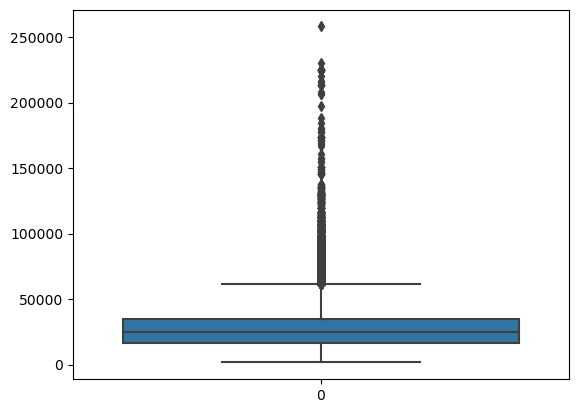

In [24]:
# since AMT_ANNUITY is a continous variable /numerical column, we can check for the outliers and upon finding can be imputed with mean or median.
sns.boxplot(current_application["AMT_ANNUITY"]);  # Plotting the boxplot to identify outliers

##### Points to note: 
As seen from the above boxplot: There are ouliers in AMT_ANNUITY column. The column being a continous variable can be imputed using median.

##### Possible reason for being outlier:
An Annuity is a loan with a monthly repayment, which is always the same amount. In other words a client pays each month the same sum. There is a formula for calculating annuity but for the purpose of this case study we can assume that for an average income person the max monthly amount would not exceed more than 65 to 70 tousand (quite hefty on monthly basis) and hence we can see there are outliers above approximately 70thousand.

In [25]:
current_application[current_application.AMT_ANNUITY.isna()]  #checking the null values

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

In [26]:
current_application["AMT_ANNUITY"].median()

24903.0

###### Note: 
As mention in the instructions for solving the problem statement it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach. The approach would be replace the NaN values with median using following instruction: current_application.AMT_ANNUITY.fillna(current_application['AMT_ANNUITY'].median(), inplace = True)

###### 5.2.'AMT_GOODS_PRICE'

In [27]:
current_application['AMT_GOODS_PRICE'].value_counts(normalize= True)*100

450000.0     8.469793
225000.0     8.228934
675000.0     8.124778
900000.0     5.017690
270000.0     3.719653
180000.0     3.294893
454500.0     2.980474
1125000.0    2.945647
135000.0     2.670937
315000.0     1.700664
1350000.0    1.639472
679500.0     1.570144
238500.0     1.528482
360000.0     1.481937
247500.0     1.405448
463500.0     1.260607
540000.0     1.224803
495000.0     1.127158
202500.0     1.048715
90000.0      1.031465
405000.0     0.961485
472500.0     0.920474
157500.0     0.880114
585000.0     0.861561
337500.0     0.814040
229500.0     0.793535
112500.0     0.706304
630000.0     0.704351
1800000.0    0.698493
720000.0     0.625584
1575000.0    0.610286
688500.0     0.593686
292500.0     0.555930
148500.0     0.544863
477000.0     0.524358
810000.0     0.510362
67500.0      0.489856
697500.0     0.458284
382500.0     0.454378
765000.0     0.454378
904500.0     0.447543
283500.0     0.446567
252000.0     0.445265
234000.0     0.416296
45000.0      0.380493
945000.0  

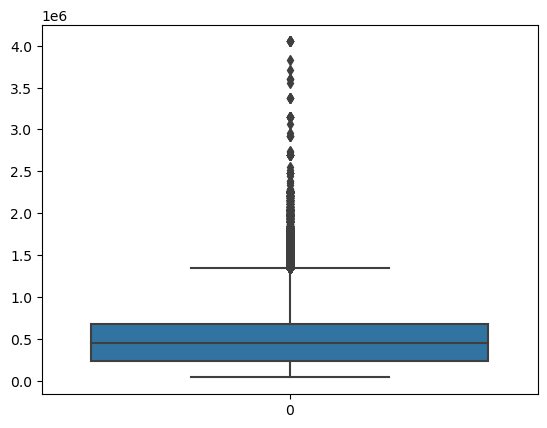

In [28]:
sns.boxplot(current_application['AMT_GOODS_PRICE']);

###### point to note: 
As seen from the above boxplot: There are ouliers in AMT_GOODS_PRICE column. The column being a continous variable can be imputed using median.


##### Possible reason for being outlier:
In the current_application dataset, AMT_GOODS_PRICE is the price for the goods for which the loan is given and 
AMT_GOODS_PRICE in the previous_application is the price of the good that the consumer have asked for loan purpose. Typically the consumer loan ranges from 10,000 to 15Lakh. Hence the amount approximately equal to or greater than 15Lakh is falling in outliers category.

In [29]:
current_application['AMT_GOODS_PRICE'].median()

450000.0

In [30]:
current_application[current_application["AMT_GOODS_PRICE"].isna()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724       100837       0    Revolving loans           F            N   
5937      106955       0    Revolving loans           F            N   
6425      107494       0    Revolving loans           F            N   
6703      107822       0    Revolving loans           F            N   
7647      108913       0    Revolving loans           M            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
724                Y             2           45000.0    135000.0       6750.0   
5937               N             0          157500.0    450000.0      22500.0   
6425               N             0           67500.0    202500.0      10125.0   
6703               N             1          121500.0    180000.0       9000.0   
7647               Y             0          180000.0    450000.0      22500.0   

      AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
724               NaN             NaN  Commercial associate   
5937              NaN             NaN               Working   
6425              NaN             NaN               Working   
6703              NaN             NaN               Working   
7647              NaN             NaN               Working   

                NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
724   Secondary / secondary special               Married  House / apartment   
5937  Secondary / secondary special               Married  House / apartment   
6425               Higher education               Married  House / apartment   
6703  Secondary / secondary special        Civil marriage  House / apartment   
7647               Higher education  Single / not married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
724                     0.024610      -10072           -381   
5937                    0.010006      -11993          -2921   
6425                    0.008474       -9727          -2712   
6703                    0.011657      -11079           -899   
7647                    0.032561       -9986          -1847   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
724              -519.0            -1834           1               1   
5937            -1289.0            -1948           1               1   
6425            -4132.0             -800           1               1   
6703            -3765.0             -572           1               1   
7647            -4762.0             -506           1               1   

      FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
724                 1                 1           0           0   
5937                1                 1           1           1   
6425                1                 1           1           0   
6703                1                 1           1           0   
7647                1                 1           1           0   

            OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
724              Core staff              4.0                     2   
5937  Private service staff              2.0                     2   
6425            Accountants              2.0                     2   
6703               Managers              3.0                     1   
7647         Security staff              1.0                     1   

      REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
724                             2                  WEDNESDAY   
5937                            2                   SATURDAY   
6425                            2                  WEDNESDAY   
6703                            1                  WEDNESDAY   
7647                            1                   SATURDAY   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
724                        14                           0   
5937                       13                           0   
6425                  

###### Note: 
As mention in the instructions for solving the problem statement it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.
The approach would be replace the NaN values with median using following instruction:
    current_application["AMT_GOODS_PRICE"].fillna(current_application['AMT_GOODS_PRICE'].median(), inplace = True)

###### 5.3. NAME_TYPE_SUITE

In [31]:
current_application.NAME_TYPE_SUITE.value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

###### Note:
As seen the column NAME_TYPE_SUITE is a categorical column, this can be imputed using the mode (i,e the most common value/ higest frequency)

In [32]:
current_application.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

###### Note:  
As mention in the instructions for solving the problem statement it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach. The approach would be replace the Null values with mode using following instruction: current_application["NAME_TYPE_SUITE"].fillna(current_application.NAME_TYPE_SUITE.mode()[0], inplace = True)

###### 5.4.'CNT_FAM_MEMBERS'

In [33]:
current_application.CNT_FAM_MEMBERS.value_counts(normalize= True)*100

2.0     51.496704
1.0     22.063419
3.0     17.105516
4.0      8.031310
5.0      1.131024
6.0      0.132679
7.0      0.026341
8.0      0.006504
9.0      0.001951
10.0     0.000976
14.0     0.000650
12.0     0.000650
20.0     0.000650
16.0     0.000650
13.0     0.000325
15.0     0.000325
11.0     0.000325
Name: CNT_FAM_MEMBERS, dtype: float64

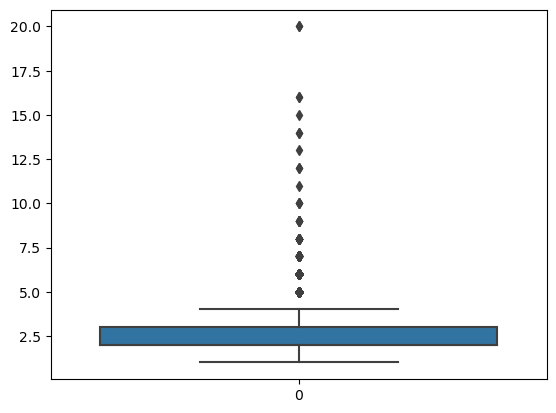

In [34]:
sns.boxplot(current_application['CNT_FAM_MEMBERS']);  

###### Note: 
As seen from the boxplot there are outliers in CNT_FAM_MEMBERS column. Also this column being the continous column the oultiers can be imputed using the median of the column.

##### Possible reason for being outlier:
Typically these days the families are nuclear, so it can be estimated that a family members would be possibly in range from 2 to 4 which can be seen in the boxplot as well. Also we can say from family members 5 and above could be joint families and hence falls under outliers

In [35]:
current_application.CNT_FAM_MEMBERS.median()

2.0

###### Note:
As mention in the instructions for solving the problem statement: Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points. The outliers can be imputed using following code:
current_application["CNT_FAM_MEMBERS"].fillna(current_application.CNT_FAM_MEMBERS.median(), inplace = True)

###### 5.5.'EXT_SOURCE_2'

In [36]:
current_application.EXT_SOURCE_2.value_counts(normalize= True)*100

2.858979e-01    0.234967
2.622584e-01    0.135897
2.652563e-01    0.111781
1.596792e-01    0.104937
2.653117e-01    0.099723
2.665198e-01    0.079517
2.631436e-01    0.079192
1.621446e-01    0.077562
1.621921e-01    0.076259
1.631870e-01    0.059964
1.604053e-01    0.056379
1.915259e-01    0.055076
2.453496e-01    0.054424
3.542247e-01    0.048558
1.942664e-01    0.045625
1.923161e-01    0.042692
3.572820e-01    0.042040
1.942151e-01    0.041388
1.953538e-01    0.040085
3.551256e-01    0.036826
3.411229e-01    0.035848
2.556162e-01    0.029982
3.585685e-01    0.029330
2.930897e-01    0.027701
2.620553e-01    0.027375
3.441915e-01    0.027375
3.573422e-01    0.026397
2.547600e-01    0.026071
3.420278e-01    0.023790
2.961436e-01    0.023464
2.007754e-01    0.023138
3.442507e-01    0.022486
1.542654e-01    0.021835
2.290030e-01    0.021835
2.962028e-01    0.021835
3.454859e-01    0.021835
2.746463e-01    0.021509
2.598076e-01    0.020857
2.974306e-01    0.020857
2.629359e-01    0.019879


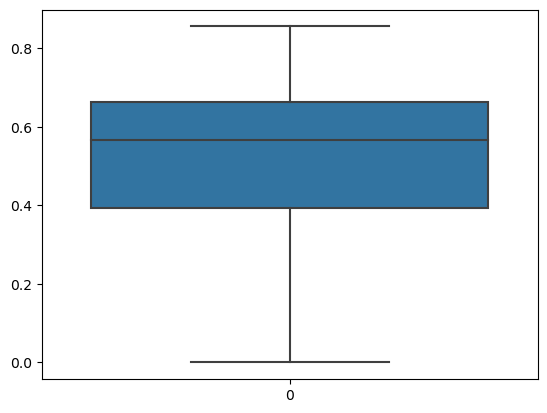

In [37]:
# EXT_SOURCE_2 is a continous column so checking for outliers:
sns.boxplot(current_application.EXT_SOURCE_2);

###### Note:
1. There are no outliers present in the EXT_SOURCE_2 column.

###### 5.5.'DEF_30_CNT_SOCIAL_CIRCLE'

In [38]:
current_application.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

### 6.1 Check the datatype / anomalies of/in all columns and change/fix the Datatypes/values accordingly
### 6.2 Data Standardization

In [39]:
current_application.dtypes #checking the data types

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [40]:
#There are a few object datatypes so checking if they need any conversion
current_application.columns[current_application.dtypes == "object"].tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

###### Note: 
The above columns can be converted to str as and when needed as per requirement. To continue further i'll be checking 'CODE_GENDER' column as i feel it may be needed (not sure) to check the male and female defaulters saparately.

In [41]:
current_application.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [42]:
#Since there are very few XNA as compaired to M (Male) and F(Female) so dropping them.
current_application = current_application.loc[current_application.CODE_GENDER != "XNA"]

In [43]:
#Rechecking to confirm
current_application.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

#### Converting the negative columns to their absolute values

In [44]:
#Considering DAYS_BIRTH column and converting it to absolute value then finding the age.Then replacing the DAYS_BIRTH with AGE_IN_YEARS
current_application.DAYS_BIRTH = current_application.DAYS_BIRTH.apply(lambda x: abs(x//365.25))  # 365.25 is taken on account of considering leap year
current_application.rename(columns=({'DAYS_BIRTH':'AGE_IN_YEARS'}), inplace=True)

In [45]:
current_application.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  AGE_IN_YEARS  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          26.0           -637            -3648.0   
1                    0.003541          46.0          -1188            -1186.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246           NaN                       1.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
0                       2.0                 -1134.0                0   
1                       0.0                  -828.0                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0                0                0                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0      

In [46]:
#The above code is working fine so similarly converting other negative to positive (abs) and renaming the columns replacing DAYS to YEARS
current_application.DAYS_EMPLOYED = current_application.DAYS_EMPLOYED.apply(lambda x: abs(x//365.25))
current_application.DAYS_REGISTRATION = current_application.DAYS_REGISTRATION.apply(lambda x: abs(x//365.25))
current_application.DAYS_ID_PUBLISH = current_application.DAYS_ID_PUBLISH.apply(lambda x: abs(x))
current_application.DAYS_LAST_PHONE_CHANGE = current_application.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x//365.25))
current_application.rename(columns=({'DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_REGISTRATION':'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE':"YEARS_LAST_PHONE_CHANGE"}), inplace=True)

In [47]:
current_application.head(3) #rechecking to ensure all columns changed.

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  AGE_IN_YEARS  YEARS_EMPLOYED  \
0                    0.018801          26.0             2.0   
1                    0.003541          46.0             4.0   
2                    0.010032          53.0             1.0   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0                10.0              2120           1               1   
1                 4.0               291           1               1   
2                12.0              2531           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                0                 1           1           0        Laborers   
1                0                 1           1           0      Core staff   
2                1                 1           1           0        Laborers   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246           NaN                       1.0   
2      0.555912      0.729567                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  YEARS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
0                       2.0                      4.0                0   
1                       0.0                      3.0                0   
2                       0.

### 7. Binning variables
Converting continous Field to categorical Field

In [48]:
current_application.AGE_IN_YEARS.describe()

count    307507.000000
mean         44.404693
std          11.945755
min          21.000000
25%          34.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: AGE_IN_YEARS, dtype: float64

In [49]:
# Since age varies from 21 t0 70 it can be binned groups
current_application["AGE_GROUP"] = pd.cut(current_application.AGE_IN_YEARS, bins= [15,25,35,45,55,65,75])

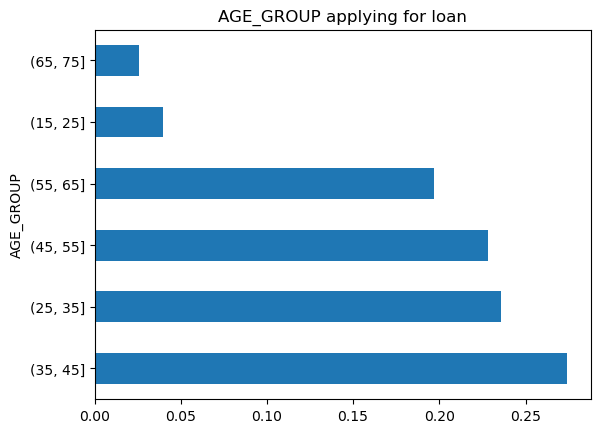

In [50]:
#Plotting the average count percentage across all age groups
current_application["AGE_GROUP"].value_counts(normalize= True).plot.barh()
plt.ylabel("AGE_GROUP")
plt.title("AGE_GROUP applying for loan");

#### Inference: 
1. As seen from the above graph we can say that the age group between 35 to 45 has higest loan requirement or this age group applies more for loan.
2. 25 to 55 also have more loan requirement.
##### Possible reason: 
1. High cost of living
2. Low income
3. Raise in cost of everyday essentials/goods (petrol/evryday consumable or necessary items etc.) is proportional to expenditure resulting in low savings. Hence for other essential or luxury commodities loan may be required.
4. Travel and education could also be the reason.
5. No compromise in standard of living

In [51]:
# Going further we can now analyse the AMT_INCOME_TOTAL by binning in diffrent group
current_application["AMT_INCOME_TOTAL"].value_counts(normalize= True)

1.350000e+05    0.116254
1.125000e+05    0.100873
1.575000e+05    0.086356
1.800000e+05    0.080385
9.000000e+04    0.073114
2.250000e+05    0.067309
2.025000e+05    0.053140
6.750000e+04    0.036250
2.700000e+05    0.035209
8.100000e+04    0.019515
3.150000e+05    0.019063
2.475000e+05    0.017375
1.260000e+05    0.015180
3.600000e+05    0.013382
1.215000e+05    0.012514
9.900000e+04    0.011814
2.925000e+05    0.011115
1.035000e+05    0.010829
7.650000e+04    0.010231
1.440000e+05    0.010156
1.710000e+05    0.008608
4.500000e+05    0.007919
1.170000e+05    0.007772
5.400000e+04    0.007541
7.200000e+04    0.007112
1.665000e+05    0.006676
4.500000e+04    0.006644
1.080000e+05    0.006328
3.375000e+05    0.005821
9.450000e+04    0.005681
1.620000e+05    0.005535
1.890000e+05    0.005499
4.050000e+05    0.005398
8.550000e+04    0.004923
1.485000e+05    0.004832
2.160000e+05    0.004572
1.305000e+05    0.004084
5.850000e+04    0.003844
6.300000e+04    0.003723
1.935000e+05    0.003450


In [52]:
current_application["AMT_INCOME_TOTAL"].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [53]:
#Grouping the income into very-low to very-high category 
current_application["INCOME_GROUP"] = pd.qcut(current_application.AMT_INCOME_TOTAL, q= [0,0.1,0.3,0.6,0.8,1], labels = ["Very Low","Low","Medium","High","Very High"])

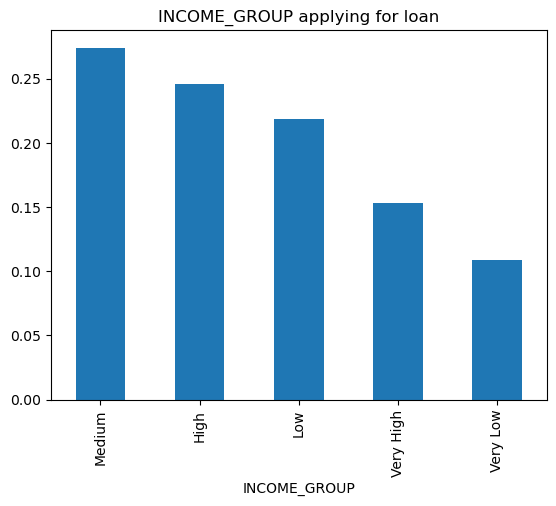

In [54]:
#Plotting the average percenatge of each income group
current_application["INCOME_GROUP"].value_counts(normalize= True).plot.bar()
plt.xlabel("INCOME_GROUP")
plt.title("INCOME_GROUP applying for loan");

#### Inference: 
From the above graph we can say that the Medium income group people have higher tendency for applying the loan.
Also very low income group does not tend to take more loans.
##### Possible reason: 
1. Affordability could be the reason.

### 8. Data imbalance detection for application data

In [55]:
#checking the average percentage for target variables.
current_application.TARGET.value_counts(normalize= True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

In [56]:
#Checking the imabalace for target variable
imbalance_ratio = 91.927013/8.072987  # ratio of target 0 (non-defatuters) to target 1 (defaulters)

In [57]:
imbalance_ratio

11.386988855549998

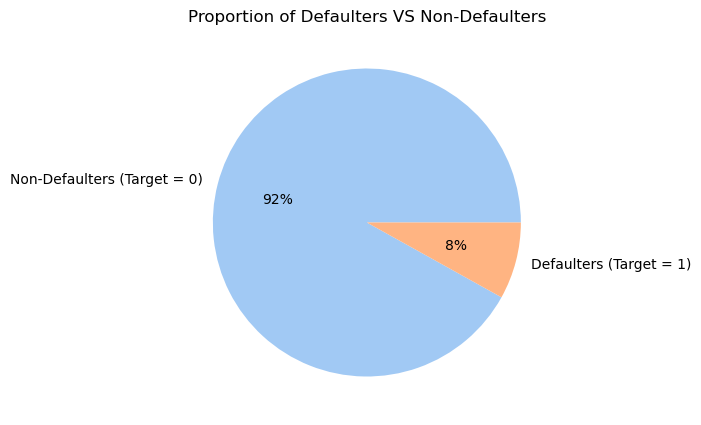

In [58]:
#Plotting the proportion of defaulters VS non-defaulters
plt.figure(figsize=[8,5])
colors = sns.color_palette('pastel')
plt.pie(current_application.TARGET.value_counts(normalize= True)*100, labels = [ "Non-Defaulters (Target = 0)", "Defaulters (Target = 1)"] ,colors = colors , autopct='%.0f%%')
plt.title("Proportion of Defaulters VS Non-Defaulters");

##### Inference: 
The pie char depicts that 8% of the people are facing difficulty in repaying the loan. Also from the imbalance ratio it is seen that every 1 applicant among 11 applicants is the defaulter.

#### Note: As suggested for further anaysis selecting 25 to 30 columns relevant for analysis.

In [59]:
current_application.columns  # all columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF

In [60]:
#selecting columns (after going through columns data) which I feel are relevant to analyse and not considering the FLAG_DOCUMENT columns as insufficient information about them.
Final_colmns = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
                'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AGE_GROUP', 'INCOME_GROUP',
                'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                'YEARS_EMPLOYED', 'YEARS_REGISTRATION','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
                'AMT_REQ_CREDIT_BUREAU_YEAR', 'REGION_RATING_CLIENT','OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
                'ORGANIZATION_TYPE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
current_application= current_application[Final_colmns]

In [61]:
# Rechecking the shape
current_application.shape

(307507, 29)

#### Spitting the dataframes into two for defaulters (target= 1) and non-defaulters (target = 0) for further analysis.

Assumption: calling cients with payment difficulty as defaulters and clients without payment difficulty as non-defaulters

In [62]:
curr_app_T1=current_application[current_application.TARGET==1]    # Separate Dataframe for clients with payment difficulty (calling them defaulters)
curr_app_T0=current_application[current_application.TARGET==0]    # Separate Dataframe for ciemts without payment difficulty (calling them non-defaulters)

### 9.Univariate Analysis

In [63]:
# to perform univariate analysis will define a function with parameter as var which could be one of the driving factors or variables
def uniplot(var):

    fig, (ax1,ax2) =plt.subplots(1,2,figsize=[16,4])
    
    sns.countplot(data=curr_app_T1, x=var, ax = ax1, palette="pastel")
    ax1.set_ylabel('Total Count')
    ax1.set_title(f'Distribution of {var} for Defaulters (TARGET =1)',fontsize=12)
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation =45, ha="right", rotation_mode = "anchor")
    
        
    sns.countplot(data=curr_app_T0, x=var, ax = ax2, palette="pastel")
    ax2.set_ylabel('Total Count')
    ax2.set_title(f'Distribution of {var} for Non-Defaulters (TARGET = 0)',fontsize=12)    
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation =45, ha="right", rotation_mode = "anchor");

### Analysing all the categorical continous columns

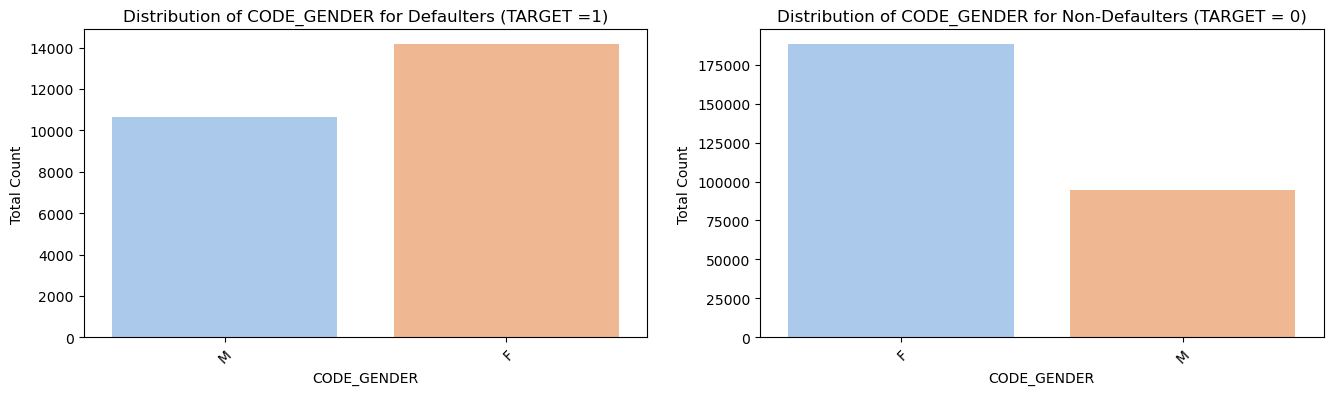

In [64]:
uniplot('CODE_GENDER') #univariate analysis of gender column

In [65]:
curr_app_T1.CODE_GENDER.value_counts(normalize= True)*100  #Male vs Female for target 1

F    57.079557
M    42.920443
Name: CODE_GENDER, dtype: float64

In [66]:
curr_app_T0.CODE_GENDER.value_counts(normalize= True)*100 #Male Vs Female for target 0

F    66.60417
M    33.39583
Name: CODE_GENDER, dtype: float64

In [67]:
#Non defaulters vs defaulters ratio:

#ratio of females:
F = 57.079557/66.60417
M = 33.39583/42.920443

print("Female:",F, "\n","Male:",M)

Female: 0.8569967466001003 
 Male: 0.7780867965412193


##### Points to note from above graph:
1. Female applying for loan are more as compaired to male reason being female have more loan offers/options and with low interest rate and are low defaulters too.
3. Male are more defaulters.

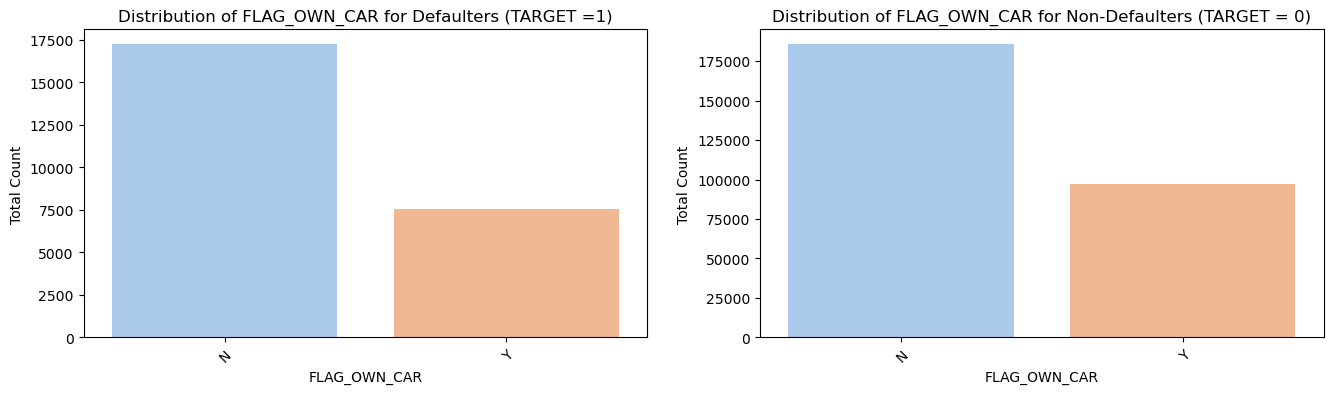

In [68]:
uniplot('FLAG_OWN_CAR') #univariate analysis of car column

##### Points to note from above graph:
1. Car owners are less defaulters. Possible reason: car comes under luxury good and some one always think of luxury items after settling down on basic needs.
2. Non-car owners are more defaulters, possible reason could be low income group. 

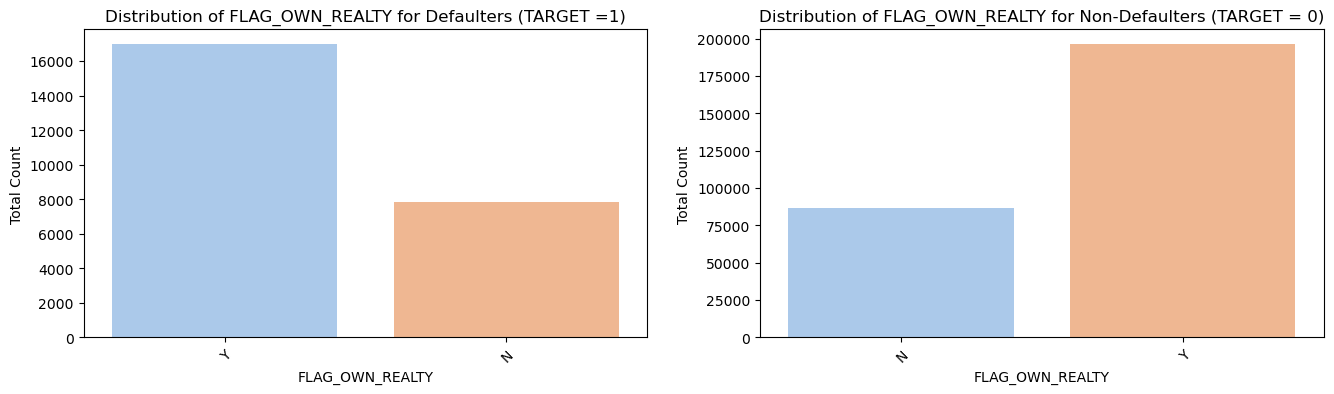

In [69]:
uniplot("FLAG_OWN_REALTY") #univariate analysis of realty column

##### Points to note from above graph:
1. Those applicants who do not own realty are more likely to default than those who own realty.

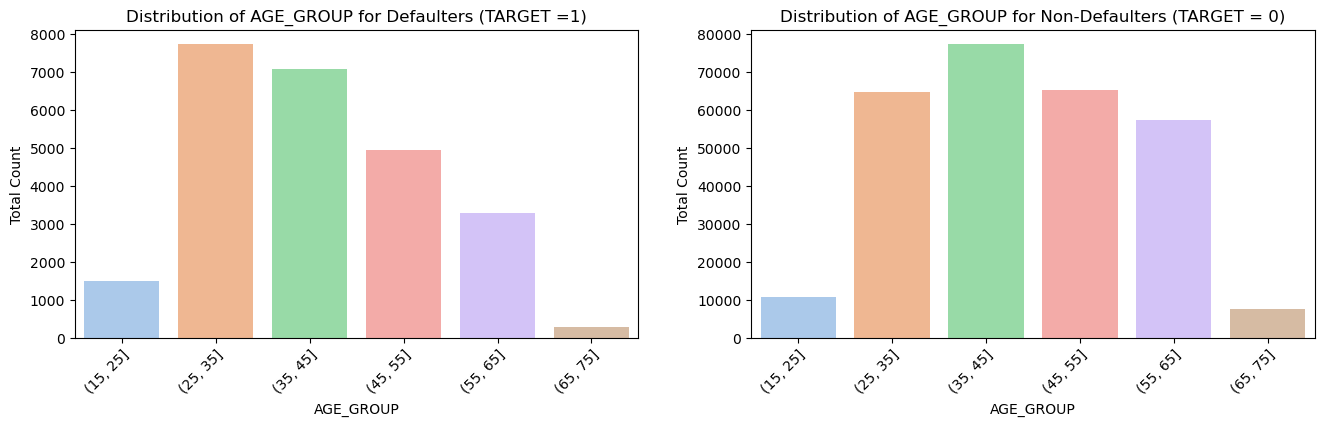

In [70]:
uniplot("AGE_GROUP") #univariate analysis of age-group column

##### Points to note from above graph:
1. Age-group 25-35 is the most risky group to lend loan.
2. With growing (after 50) age people tend to default less: possible reason income stability.

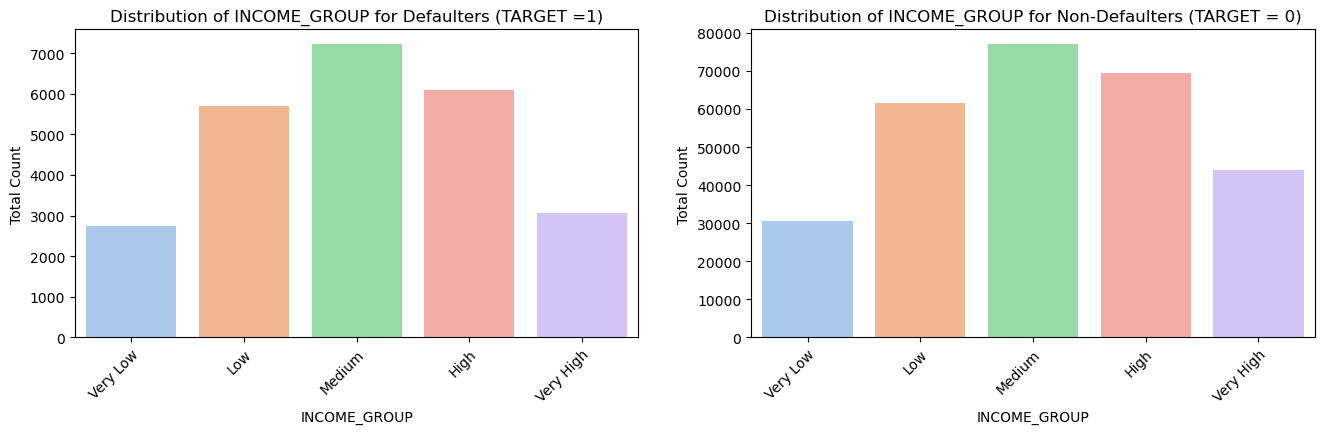

In [71]:
uniplot("INCOME_GROUP") #univariate analysis of Income-group column

##### Points to note from above graph:
Medium income range group are more defaulters as their count for loan application is also more.
This also proves to be a supportive parameter for Car owners being less defaulters. As car comes under luxury good and some one always think of luxury items after settling down on basic needs. Applicants with low/medium/very low income-group may not necessarily own car.

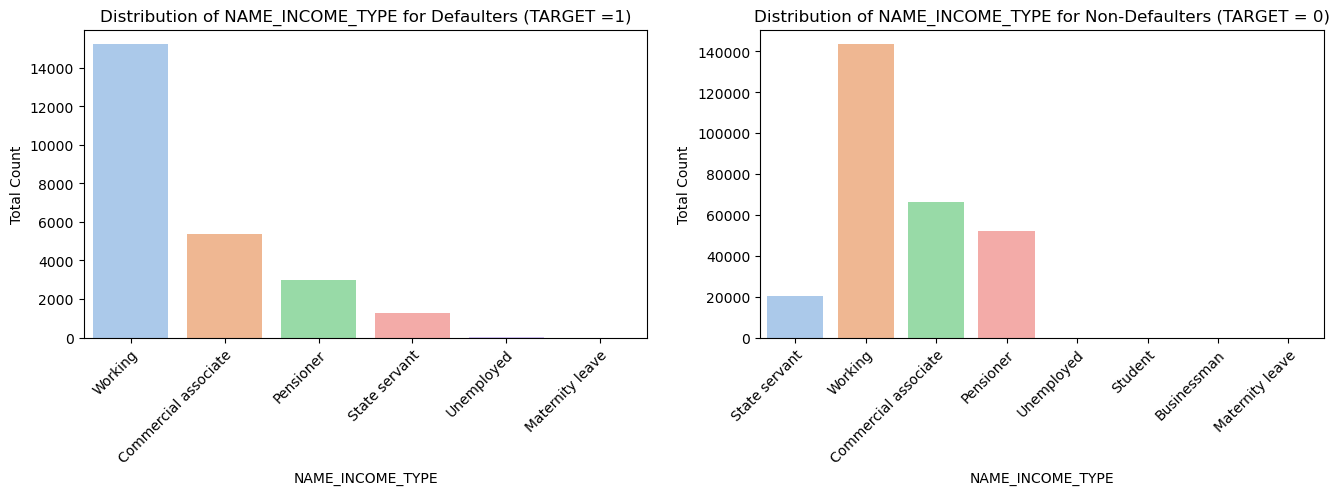

In [72]:
uniplot("NAME_INCOME_TYPE")  #univariate analysis of Income-type column

In [73]:
curr_app_T1.NAME_INCOME_TYPE.value_counts(normalize= True)*100 #checking the percentage of income type for defaulters

Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: NAME_INCOME_TYPE, dtype: float64

In [74]:
curr_app_T0.NAME_INCOME_TYPE.value_counts(normalize= True)*100  #checking the percentage of income type for non-defaulters

Working                 50.780382
Commercial associate    23.438351
Pensioner               18.529655
State servant            7.235692
Student                  0.006368
Unemployed               0.004953
Businessman              0.003538
Maternity leave          0.001061
Name: NAME_INCOME_TYPE, dtype: float64

##### Points to note from above graph:
1. Working category (61.32%) has high defaulters compared to other groups
2. Unemployed, student, maternity leave are the groups to be least bothered for considering loan.
3. Businessman group applies more for loan but needs further analysis.
4. State sevants defaults less. (5% of total defaulters)

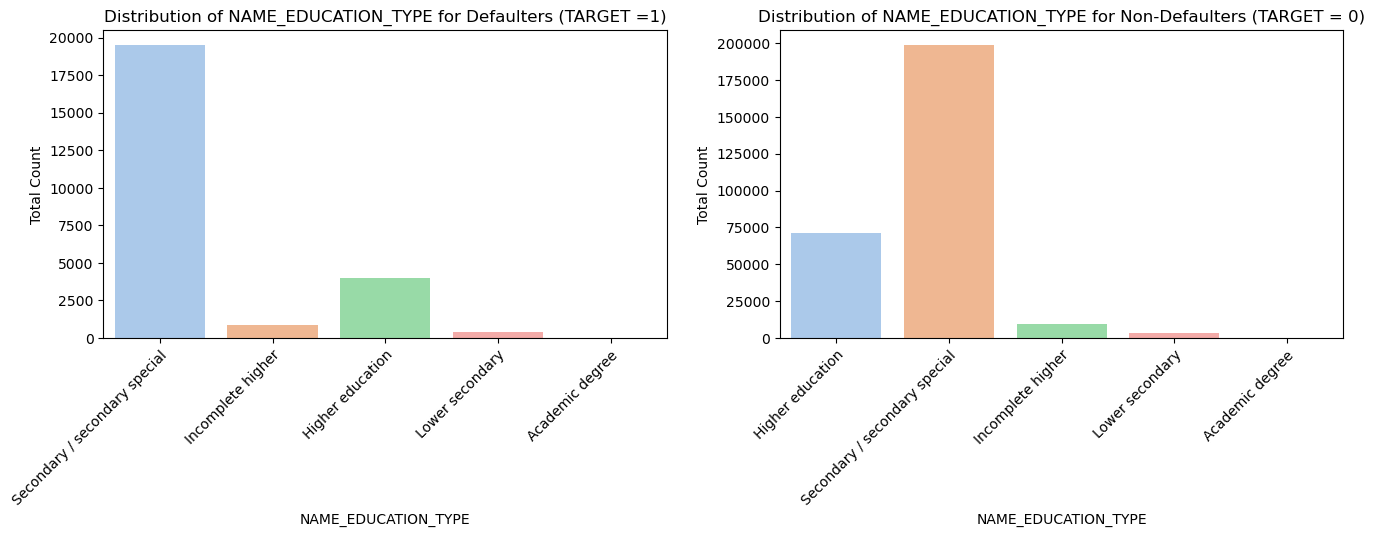

In [75]:
uniplot("NAME_EDUCATION_TYPE")   #univariate analysis of eduaction-type column

##### Points to note from above graph:
1. Higher education group have least tendancy to default compaired to any other group
2. Those who have Lower secondary, Academic degree and Incomplete higher education tends to default more.

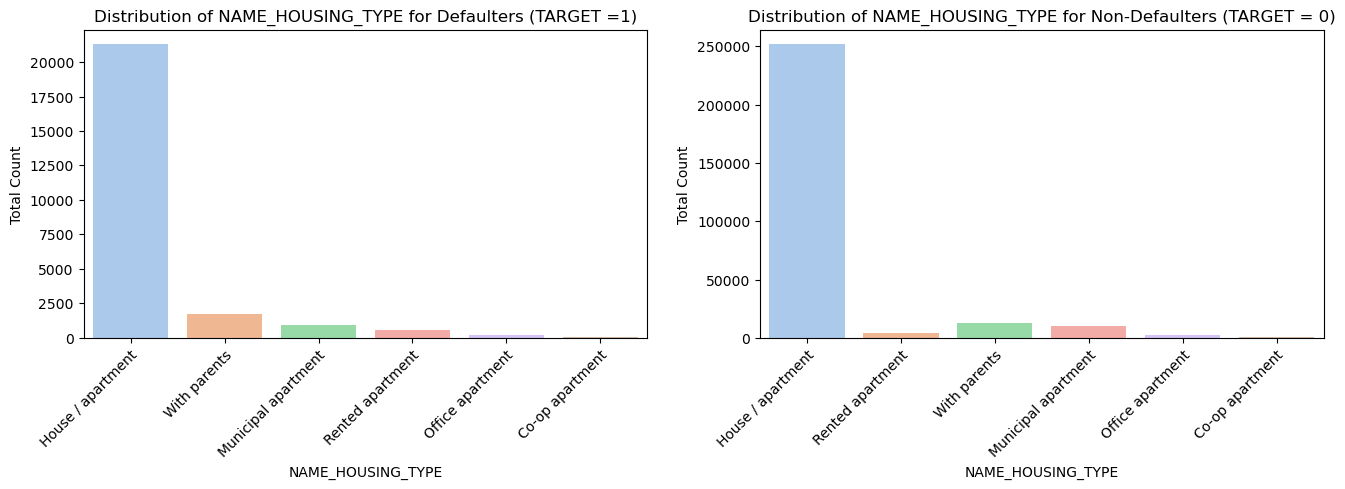

In [76]:
uniplot("NAME_HOUSING_TYPE") #univariate analysis of housing-type column

###### Points to note from above graph:
1. Applicants who own House/Appartment apply for more loans.

2. People living with parents tend to default more often may be because more people living in house is proportional to more expences.

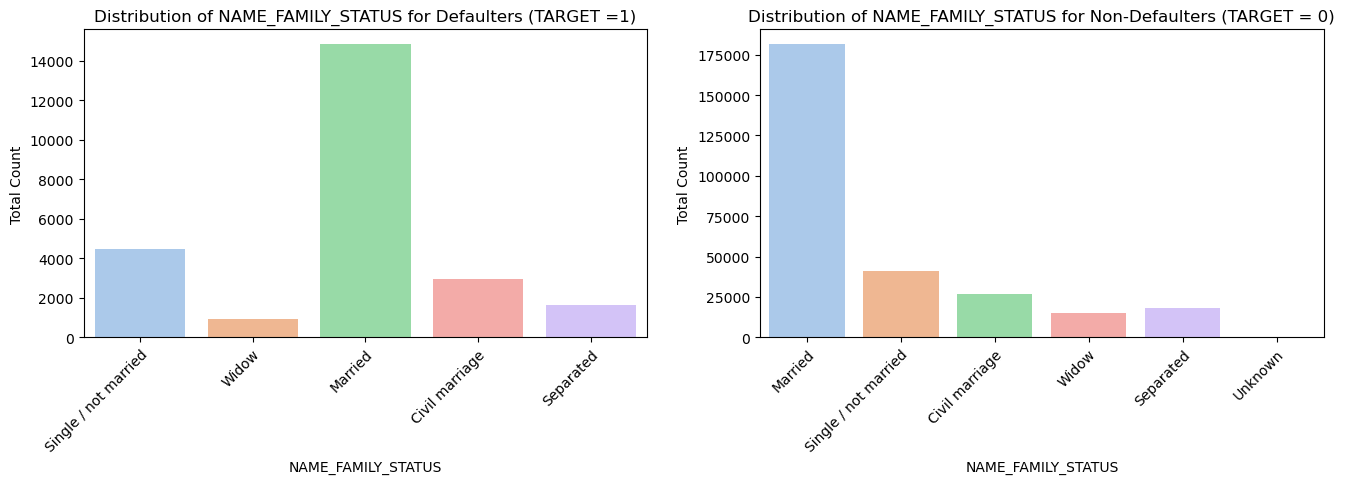

In [77]:
uniplot("NAME_FAMILY_STATUS") #univariate analysis of family status column

##### Points to note from above graph:
1. Married have higher tendency for applying loan
2. Single/not married and widow are risky group

#### Univariate Unordered variable analysis

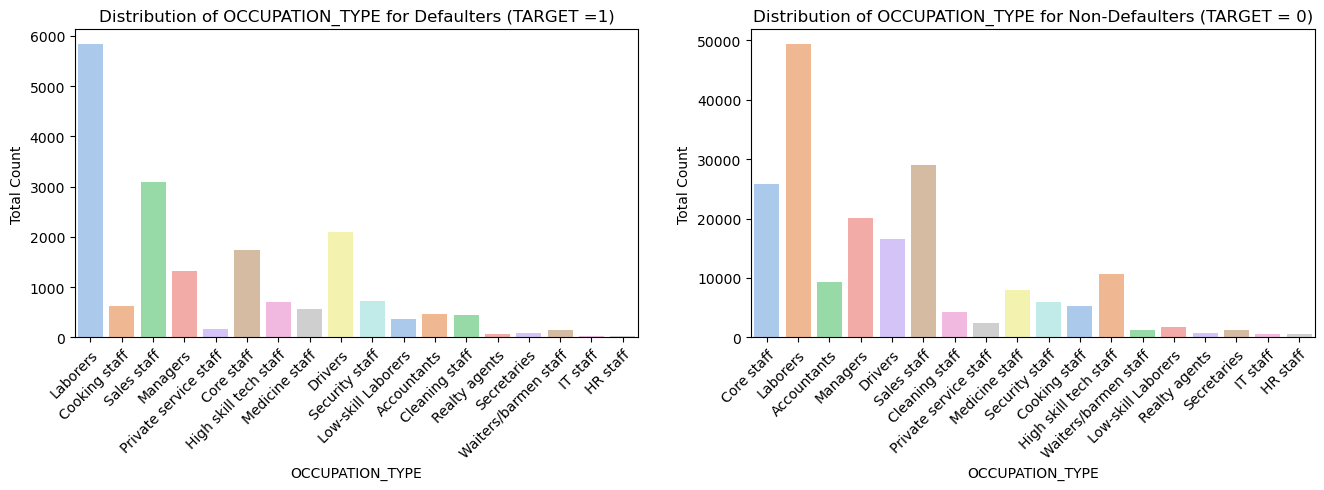

In [78]:
uniplot("OCCUPATION_TYPE")   #univariate analysis of occupation-type column

In [79]:
(curr_app_T1.OCCUPATION_TYPE.value_counts(normalize= True)*100).head()  # checking the average percentage across first five defaulters

Laborers       31.476789
Sales staff    16.671160
Drivers        11.360328
Core staff      9.370788
Managers        7.160188
Name: OCCUPATION_TYPE, dtype: float64

###### Points to note from above graph:
1. 37.48% among all the defaulters belongs Laborers group
2. Sales staff also have more defaulters- 16.68%, Drivers have 11.36% default.
2. Realty agents, Secretaries, IT and HR staff are least defaulters, possible reason being high income.

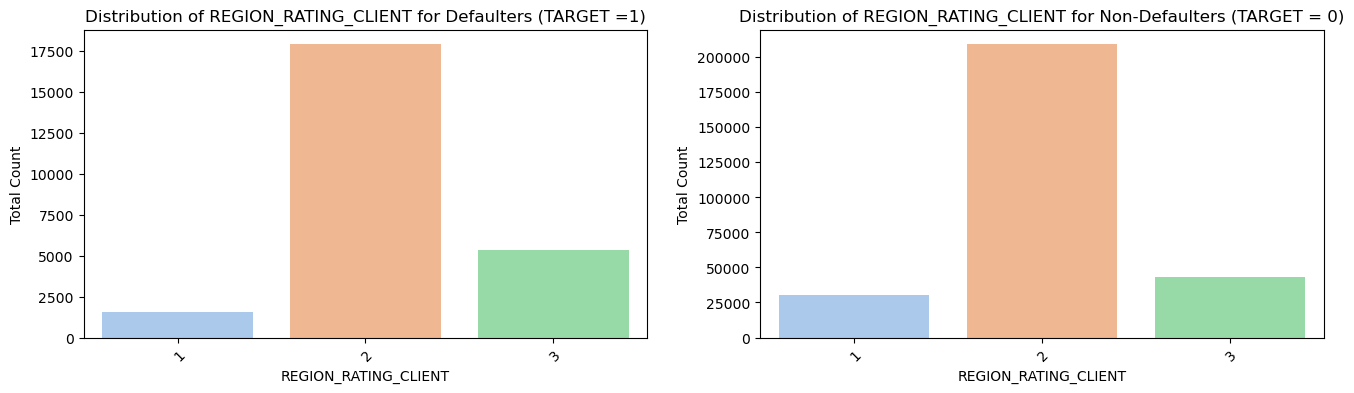

In [80]:
uniplot("REGION_RATING_CLIENT")  #univariate analysis of region rating column

##### Points to note from above graph:
1. Clients beloging to region with Rating of 2 are more likely to apply for loan and are low defaulters.
2. Clients with region rating 3 are more defaulters.

#### Univariate continous variable analysis

In [81]:
# function to hist plot for continuous variables
def uni_cont_plot(var):

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    sns.distplot((curr_app_T1[var].value_counts(normalize = True)*100),ax=ax1, bins = 50)

    ax1.set_title(f'Distribution of {var} for Defaulters(TARGET = 1)',fontsize=10)
            
    sns.distplot((curr_app_T0[var].value_counts(normalize = True)*100),ax=ax2, bins= 50)
    ax2.set_title(f'Distribution of {var} for Non-Defaulters(TARGET = 0)',fontsize=10);

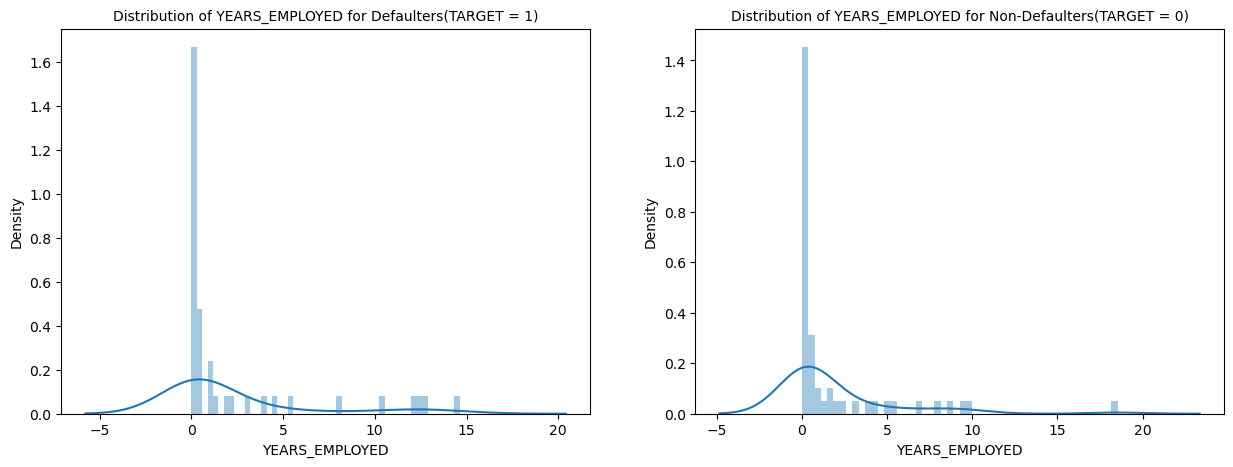

In [82]:
uni_cont_plot("YEARS_EMPLOYED")  #univariate analysis of years employed column

##### Points to note from above graph:
1. Employment below 5 years have more defaults.

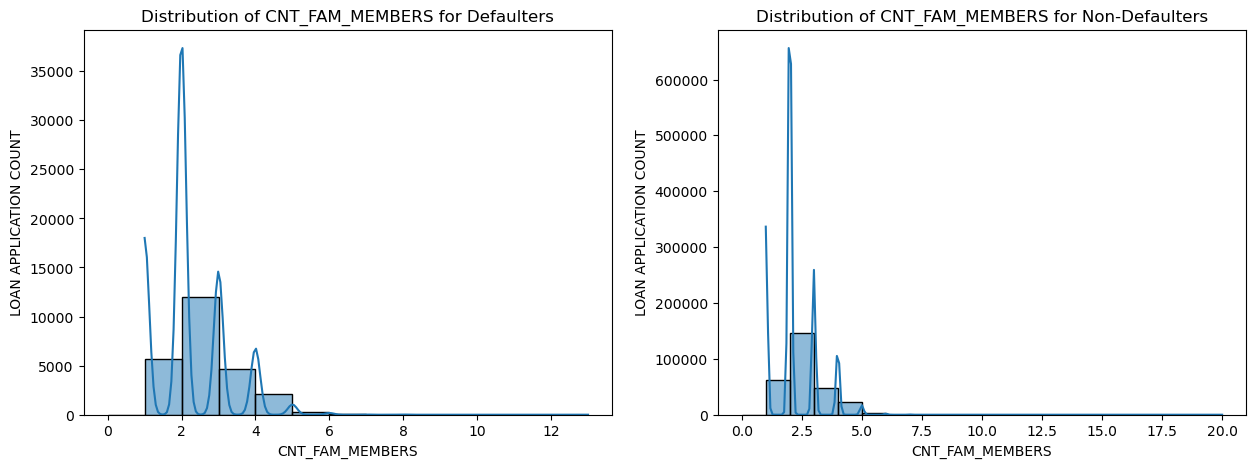

In [83]:
#Plotting the graph for count of family members (CNT_FAM_MEMBERS)
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.histplot(data=curr_app_T1, x= curr_app_T1['CNT_FAM_MEMBERS'], kde=True, bins=range(10))
plt.title('Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=12)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')


plt.subplot(1, 2, 2)
sns.histplot(data=curr_app_T0, x= curr_app_T0['CNT_FAM_MEMBERS'], kde=True,bins=range(10))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=12)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT');

##### Points to note from above graph:
1. Family with 2 to 3 members are applying more for loan. Also they tend to default more.
2. As the number of family members increases their default rate increases.
3. After the count of 6 members the default is 100%

### 10. Bivariate Analysis and multivariate analysis

#### Bivariate analysis for continous columns

In [84]:
# defining bar plot for continous columns

def bi_cont_plot(var1, var2):
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
    fig.tight_layout(pad=15.0)
    
    sns.barplot(data=curr_app_T1, y=var1, x=var2, ax=ax1, palette="pastel", hue = "CODE_GENDER")
    ax1.set_ylabel(var1)    
    ax1.set_xlabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Defaulters (Target 1)',fontsize=12)
    
    
    sns.barplot(data=curr_app_T0,y=var1, x=var2,ax=ax2, palette="pastel",hue = "CODE_GENDER")
    ax2.set_ylabel(var1)    
    ax2.set_xlabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Non-Defaulters (Target 0)',fontsize=12);

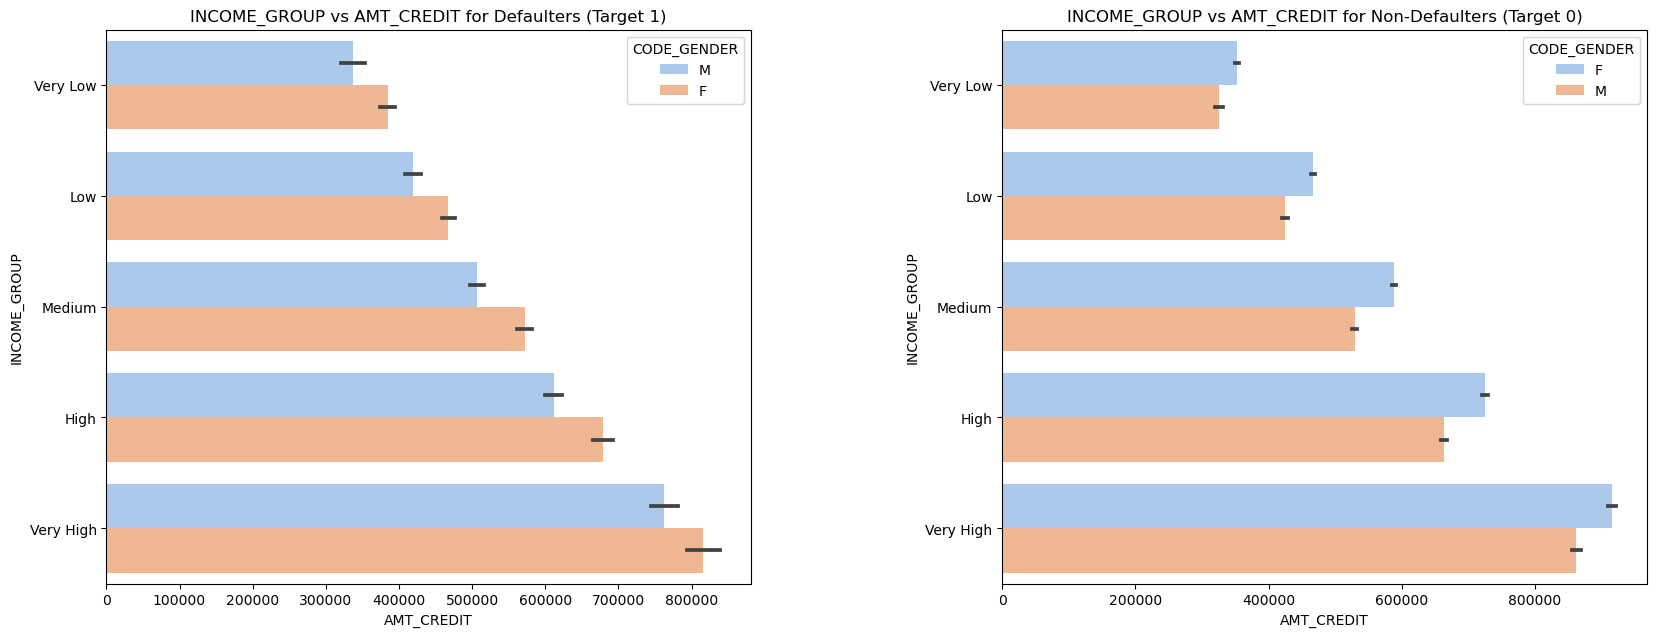

In [85]:
bi_cont_plot("INCOME_GROUP","AMT_CREDIT")    #bvariate analysis for income- group and amt_credit 

##### Points to note:
1. Males having very-high income group defaults less.
2. Males with medium and high income group defaults more.
3. Females are less defaulters.

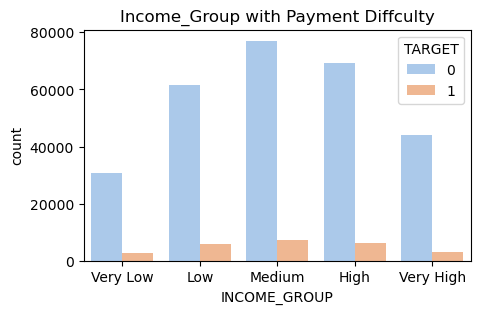

In [86]:
#Checking the same columns to see the affect of Very High Income group
plt.figure(figsize = (5,3))
plt.title("Income_Group with Payment Diffculty")
sns.countplot(x= 'INCOME_GROUP', hue = 'TARGET', data =current_application, palette="pastel");

##### Points to note:
1. Maximum loan payment difficulty is from medium group. 
2. Also High income group has more defaulters, the organization needs to revise their offers to attract more customers from this income group.

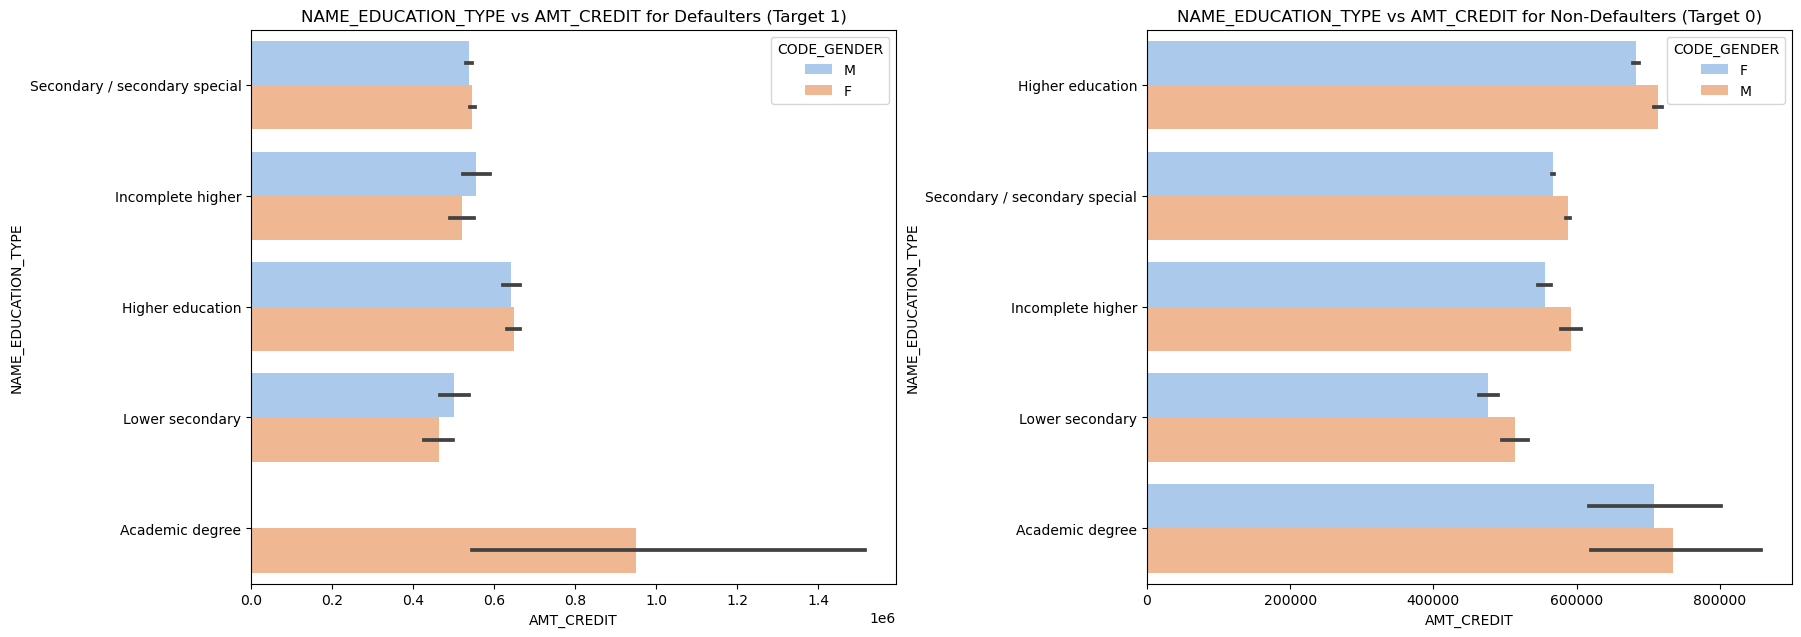

In [87]:
bi_cont_plot("NAME_EDUCATION_TYPE","AMT_CREDIT"); #bivariate plot for name_education_type and amt_credit

##### Points to note:
Defaulters from Academic degree are more.

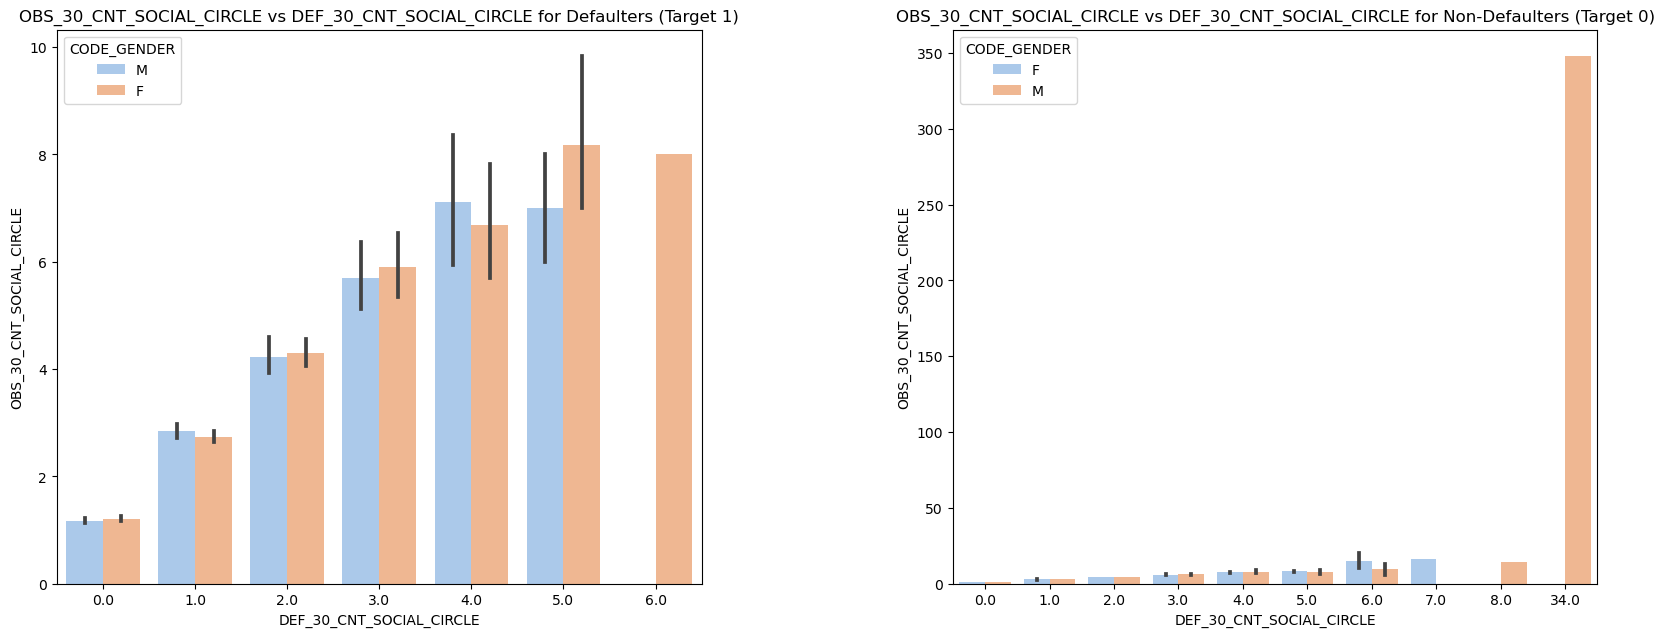

In [88]:
bi_cont_plot("OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE");  #bivariate plot for observations and defaulted in social area

###### Points to note:
1. DEF_30_CNT_SOCIAL_CIRCLE could be a parameter to be considered as both males and females have more or less similar tendancy to default based upon social circle.
2. In this case REGION_RATING_CLIENT parameter needs to be verified first

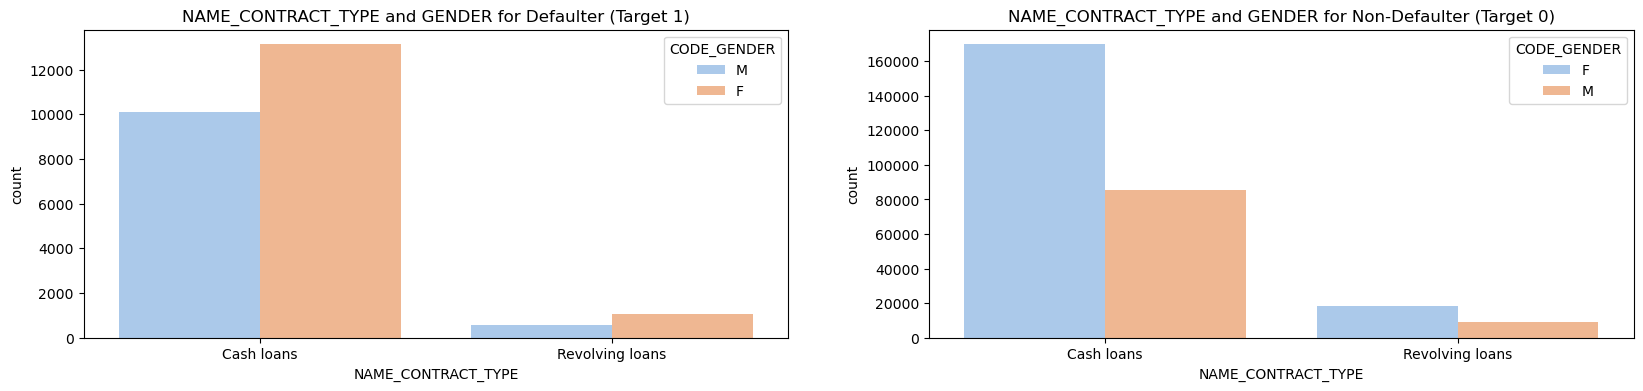

In [89]:
# Analysing two categorical columns

plt.figure(figsize = (20,4))

plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and GENDER for Defaulter (Target 1)")

sns.countplot(data =curr_app_T1,x='NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', palette="pastel")

plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and GENDER for Non-Defaulter (Target 0)")
sns.countplot(data =curr_app_T0, x='NAME_CONTRACT_TYPE', hue = 'CODE_GENDER',palette="pastel" );

##### Points to note:
1. Be it cash loan or Revolving loans Male clients are more defaulters than females.
2. Cash loans have more default.

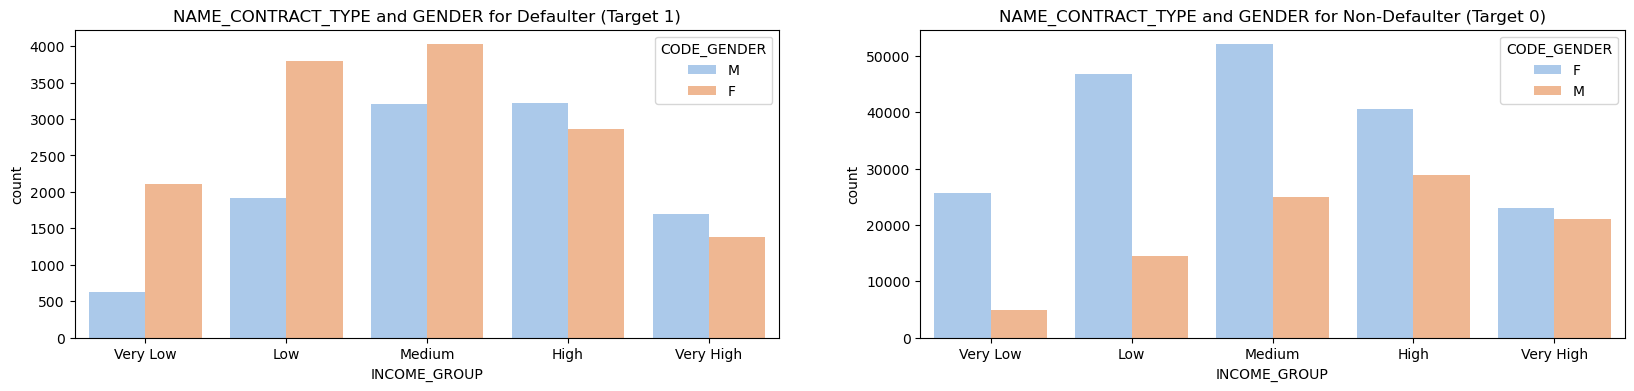

In [90]:
# Analysing two categorical columns
plt.figure(figsize = (20,4))

plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and GENDER for Defaulter (Target 1)")

sns.countplot(x='INCOME_GROUP', hue = 'CODE_GENDER', data =curr_app_T1,  palette="pastel")

plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and GENDER for Non-Defaulter (Target 0)")
sns.countplot(x='INCOME_GROUP', hue = 'CODE_GENDER', data =curr_app_T0,  palette="pastel");

##### Points to note:
1. Males with low medium income group are likely to default more.
2. Males with high and very-high income group are likely to default less. So bank may consider this group for lending loans.
3. Income group prooves to be one of the strong driver variable for analysis.

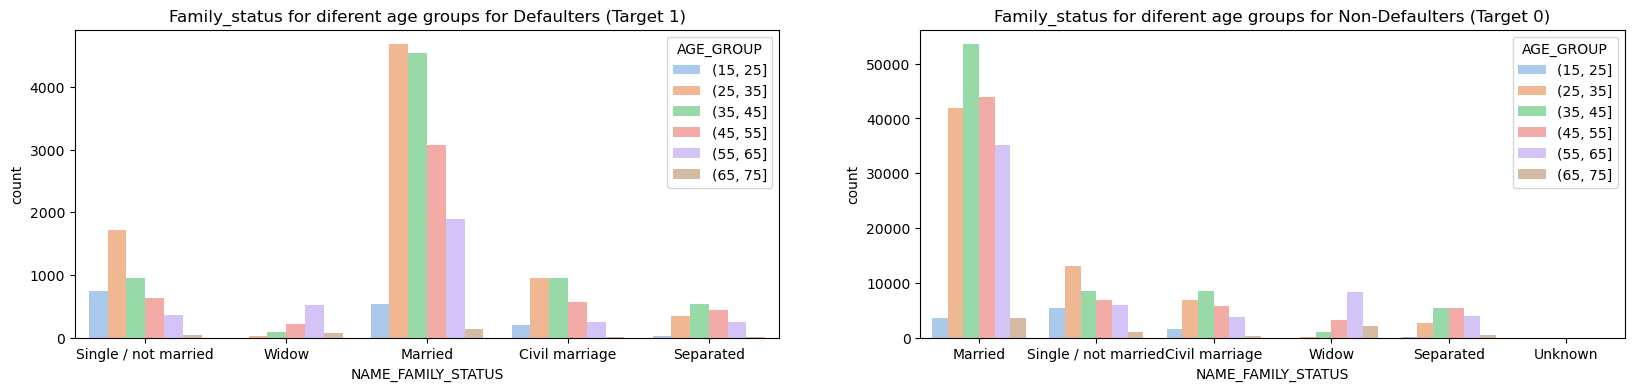

In [91]:
# Analysing two categorical columns
plt.figure(figsize = (20,4))

plt.subplot(1,2,1)
plt.title("Family_status for diferent age groups for Defaulters (Target 1)")

sns.countplot(x='NAME_FAMILY_STATUS', hue = 'AGE_GROUP', data =curr_app_T1, palette= "pastel")

plt.subplot(1,2,2)
plt.title("Family_status for diferent age groups for Non-Defaulters (Target 0)")
sns.countplot(x='NAME_FAMILY_STATUS', hue = 'AGE_GROUP', data =curr_app_T0, palette= "pastel");

###### Points to note:
1. Middle and lower age groups are riskier group for granting loans.
2. Married clients belonging from 25 to 45 age group have more payment difficulties and tend more towards defaulters.
3. This can also be one of the parameters to be considered before loan approval.

### 11. Top 10 Correlations:

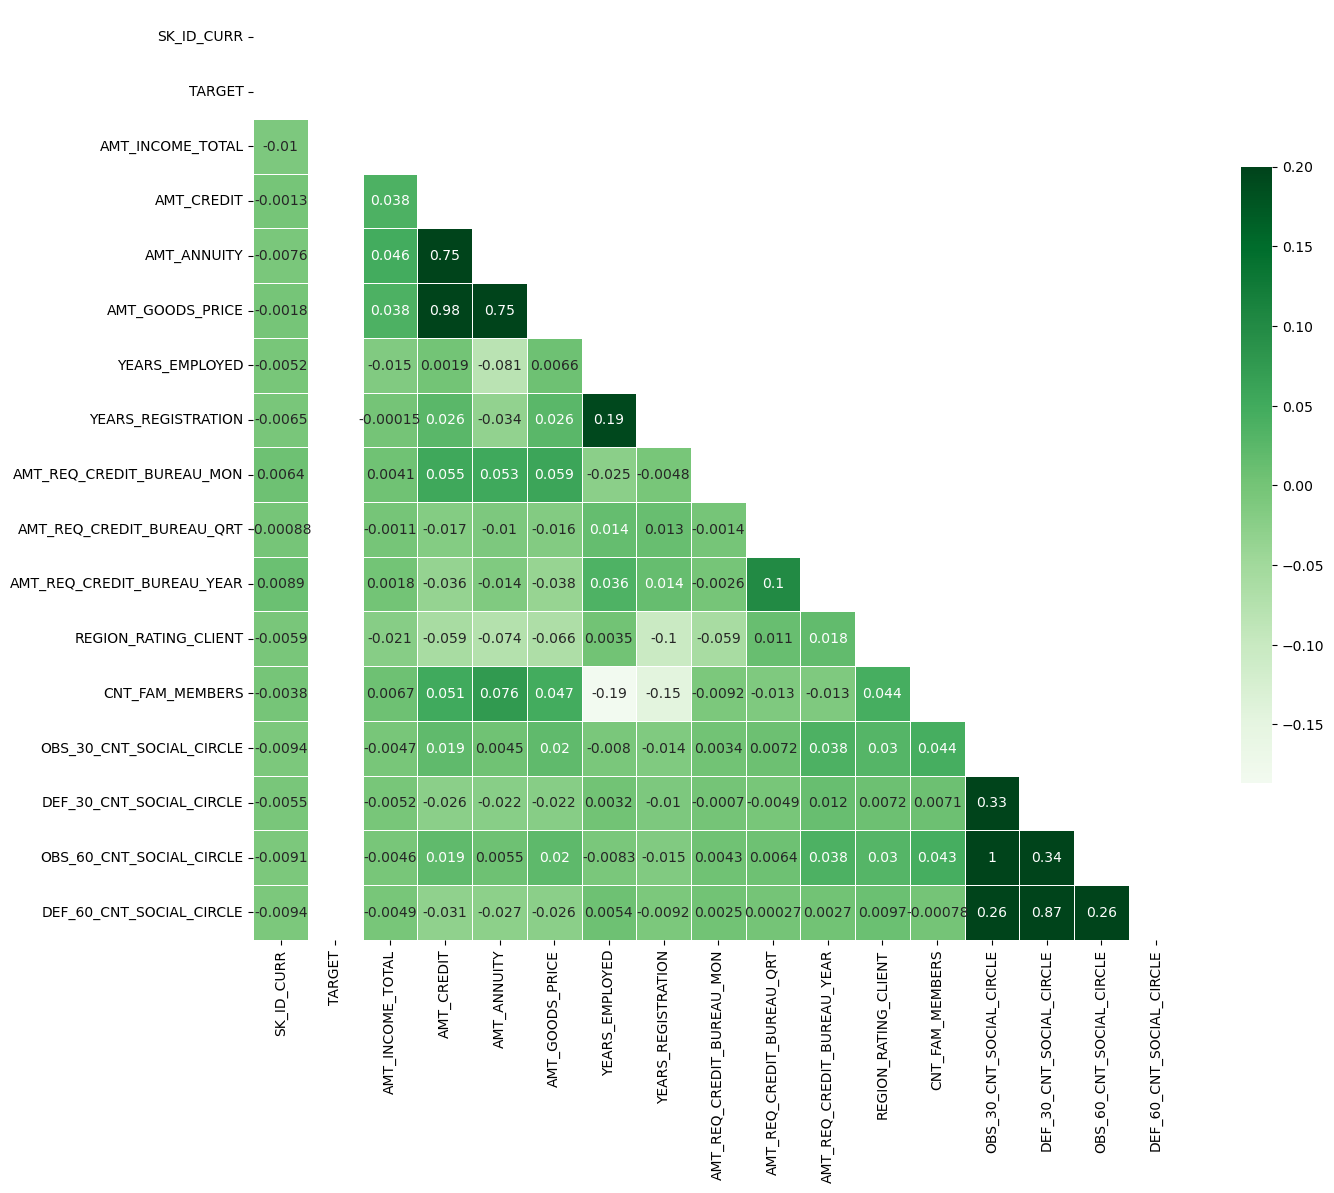

In [92]:
#Getting the top correlation factors for defaulters (target 1)

corr_matrix = curr_app_T1.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,16))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap="Greens", vmax=.2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True);

#reference for code: https://seaborn.pydata.org/examples/many_pairwise_correlations.html 

In [93]:
#Getting the top 10 correlation for defaulters (Target =1)
top = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
top_10_corr = top[:10]
top_10_corr

OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998269
AMT_CREDIT                AMT_GOODS_PRICE             0.983103
DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.868994
AMT_ANNUITY               AMT_GOODS_PRICE             0.752699
AMT_CREDIT                AMT_ANNUITY                 0.752195
DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.337181
OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.333825
OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.264159
OBS_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.261009
YEARS_EMPLOYED            YEARS_REGISTRATION          0.192568
dtype: float64

##### Points to note:
1. OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE have higest correlation i,e 0.99
2. AMT_GOODS_PRICE and AMT_CREDIT also have high correlation in them i,e 0.98
3. AMT_ANNUITY and AMT_CREDIT show good correlation
4. DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE

well the high correlation means these variables are strongly associated or related to each other. Which can be considered for further anaysis to find the associated parameters to check causation.

<Figure size 600x600 with 0 Axes>

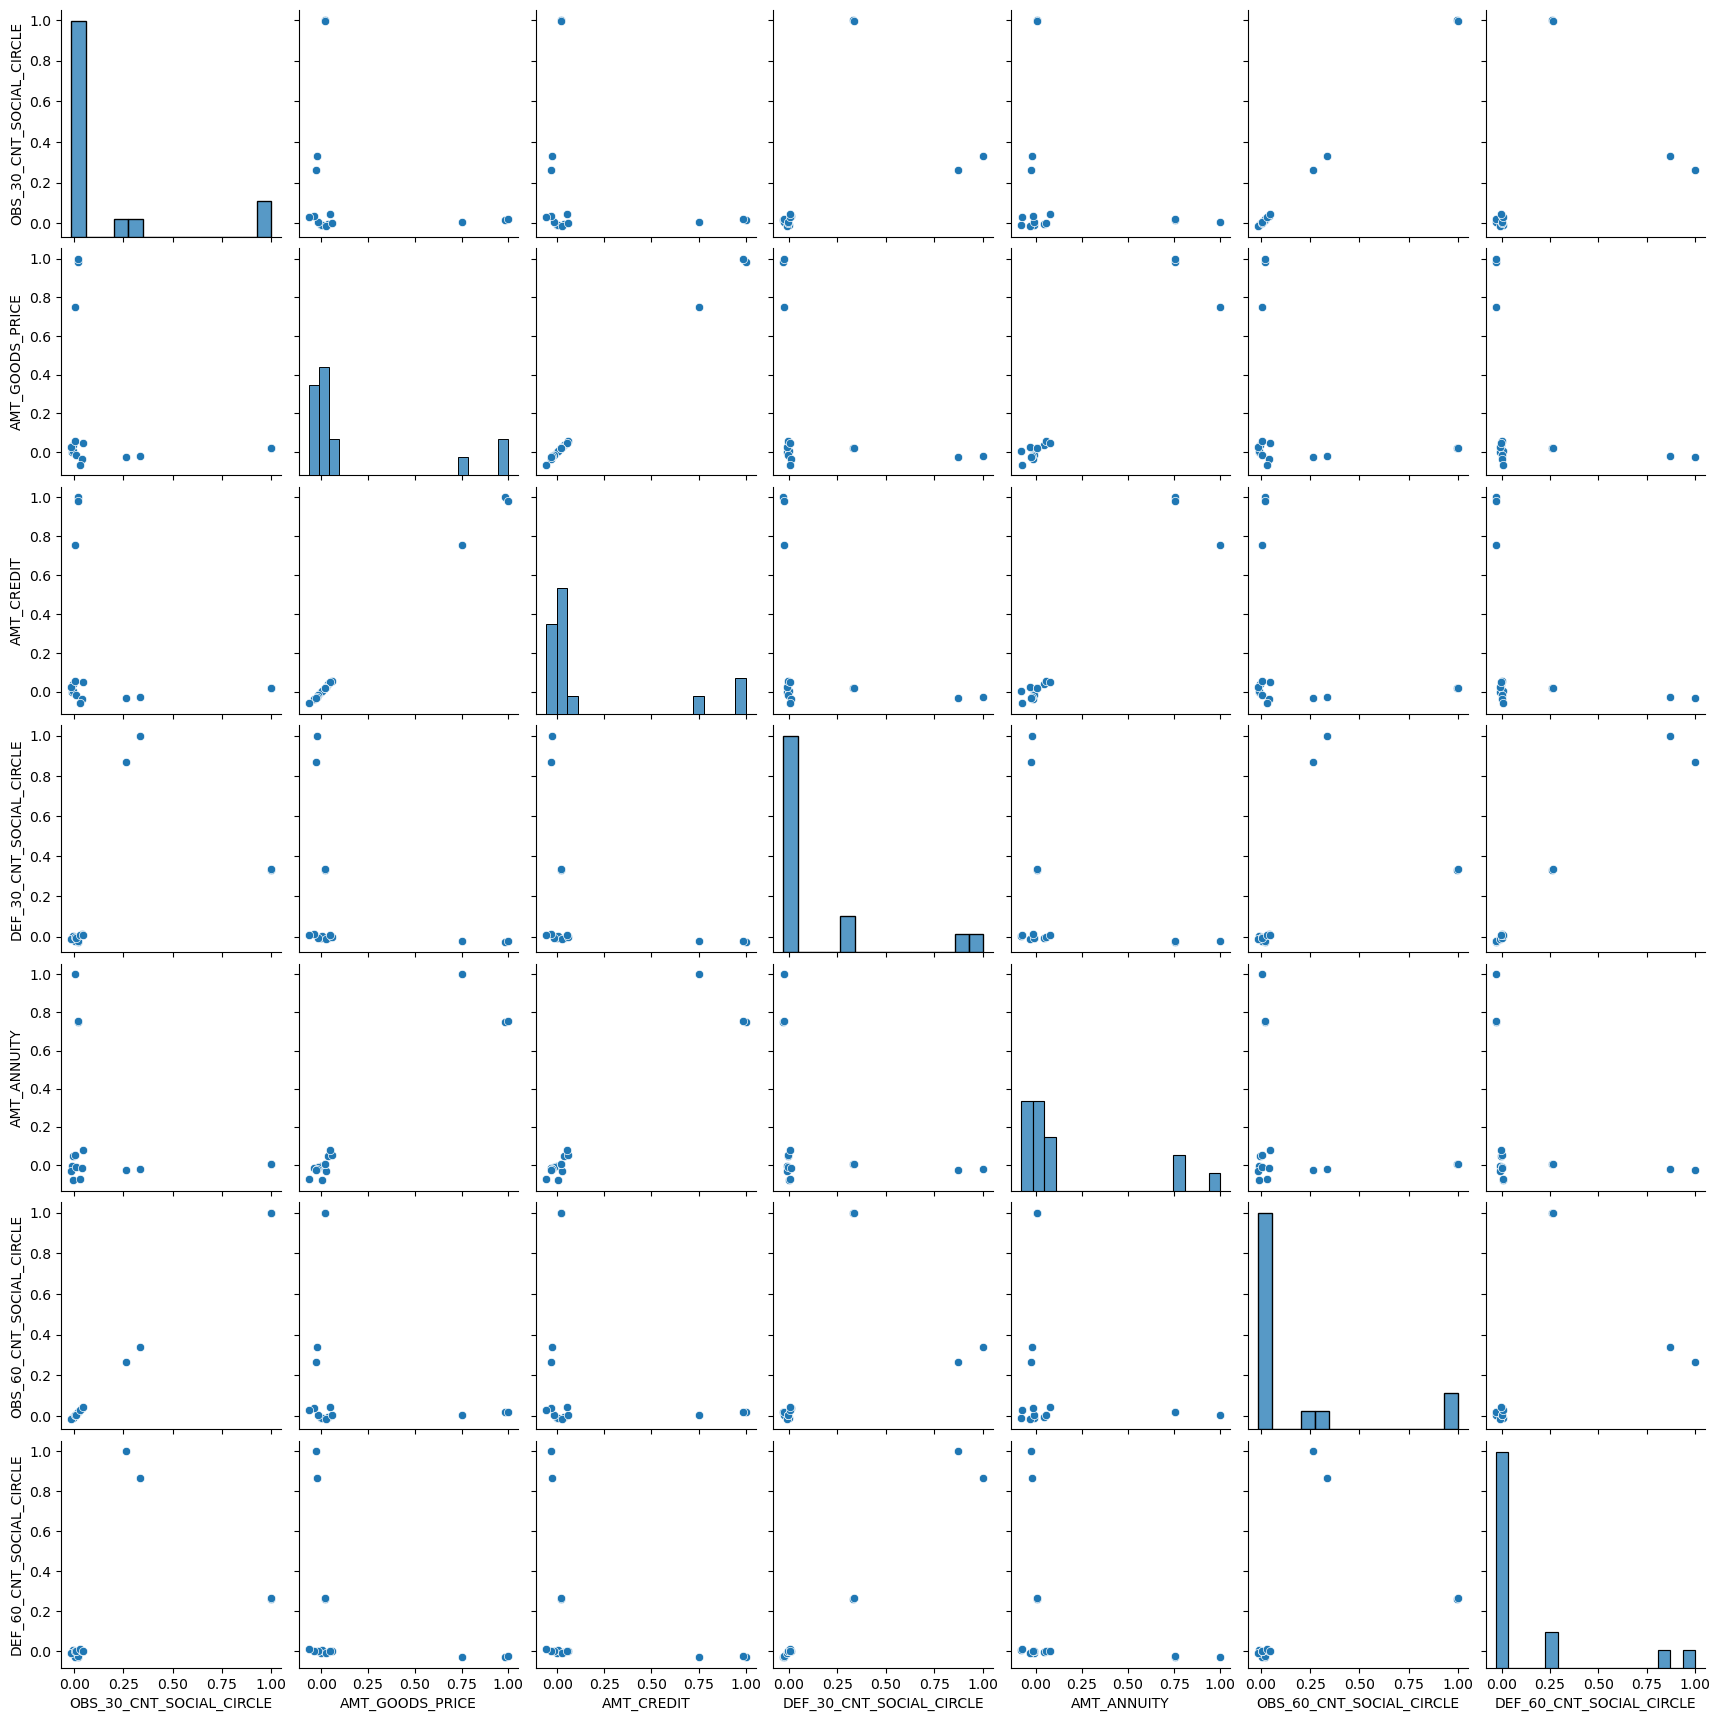

In [94]:
# Analysing the pattern to see their association
plt.figure(figsize=(6,6))
sns.pairplot(corr_matrix[['OBS_30_CNT_SOCIAL_CIRCLE','AMT_GOODS_PRICE', 'AMT_CREDIT', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']], palette="pastel");

1. AMT_GOODS_PRICE and AMT_CREDIT and AMT_ANNUITY shows positive trend. So would be okay to assume that high loan is required for high goods value. AMT_GOODS_PRICE and AMT_CREDIT are proportional to each other.
2. OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are strongly related. This seems to be one of the parameters to be considered. Those who are likely more to be more defaulters in 30 DPD are not necessarily but likely to be defaulters for 60 DPD.
3. DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE also shows positive correlation. However they doesn't seem to have any relation with AMT_GOODS_PRICE and AMT_CREDIT.

Majorly banks need the surrounding information for examining if more loans required in same locality or if any other loan requirement is there. To keep track of repayment of loan as well.

### 12. Previous data Analysis

In [95]:
#Reading the previous data again
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [96]:
previous_application.shape

(1670214, 37)

In [97]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [98]:
previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [99]:
# Finding the percentage of missing values in all columns
round(previous_application.isnull().mean()*100,2).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

In [100]:
# Dropping the columns with more than 50% missing values, since the number of columns are 37
previous_application.drop(columns = (previous_application.loc[:,previous_application.isnull().mean()>0.5]),inplace =True)

In [101]:
previous_application.shape  #checking the shape

(1670214, 33)

In [102]:
# Checking below the missing values in columns less than 13%
missing_less_than_13_in_prev = list(previous_application.columns[(previous_application.isnull().mean()<0.13)])

In [103]:
#Checking the missing vales greater than 0%
missing_greater_than_0_in_prev = list(previous_application.columns[(previous_application.isnull().mean()>0)])

In [104]:
#Final missing values
previous_application_null = list(set(missing_less_than_13_in_prev).intersection(set(missing_greater_than_0_in_prev)))

In [105]:
#Printing the missing values
previous_application_null

['PRODUCT_COMBINATION', 'AMT_CREDIT']

#### Note: Leaving the above missing as it is and not dropping them because AMT_CREDIT is one of the strong parameter to be considered for furtehr analysis.

In [106]:
previous_application.columns #checking column names

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

#### checking other columns for analysis

In [107]:
previous_application.PRODUCT_COMBINATION.value_counts(normalize= True)*100 #checking avg percentage

Cash                              17.126503
POS household with interest       15.786996
POS mobile with interest          13.214817
Cash X-Sell: middle                8.616430
Cash X-Sell: low                   7.799898
Card Street                        6.741970
POS industry with interest         5.918612
POS household without interest     4.964943
Card X-Sell                        4.825651
Cash Street: high                  3.571480
Cash X-Sell: high                  3.551239
Cash Street: middle                2.075493
Cash Street: low                   2.026148
POS mobile without interest        1.442150
POS other with interest            1.429993
POS industry without interest      0.754670
POS others without interest        0.153006
Name: PRODUCT_COMBINATION, dtype: float64

In [108]:
# There are many columns to analyse so dropping the non required ones:
columns_to_drop = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                   'NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY','NAME_PRODUCT_TYPE']
previous_application.drop(columns = columns_to_drop, inplace = True)

In [109]:
previous_application.shape #rechecking shape

(1670214, 28)

In [110]:
previous_application.columns #printing column names

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [111]:
#### Performing univariate analysis on previous_application data

In [112]:
#defining the invaioate plot
def uniplot_prev_app(var):

    fig, ax =plt.subplots(1,figsize=[10,4])
    sns.countplot(data=previous_application , x=var, palette="pastel", hue= "NAME_CONTRACT_STATUS")
    ax.set_ylabel('Total Count')
    ax.set_title(f'Distribution of {var}',fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(),rotation =45, ha="right", rotation_mode = "anchor");

In [113]:
# will perform univariate analysis on categorical columns: NAME_CONTRACT_TYPE , NAME_PAYMENT_TYPE, NAME_CLIENT_TYPE, NAME_PORTFOLIO,NAME_YIELD_GROUP

Assumption: Leaving the XNA as it is since not much information is available about it. Don't know if it is null or can be treated as missing.

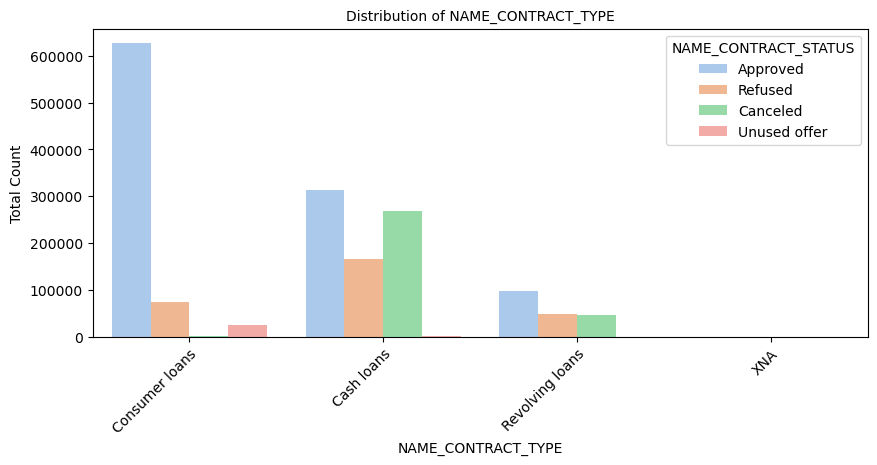

In [114]:
uniplot_prev_app("NAME_CONTRACT_TYPE")

##### Points to note:
1. Cash loan have high rejection rate and also major cancellation are of cash loan.
2. Revolving loan also seem to have high reection However the cancellation and rejection are approximatey same.
3. Consumer loans are approved more. Makes sense because people tend to buy products like television sets, air-conditioners, home theatre systems, refrigerators, laptops, mobile phones, cameras , modular kitchens etc on loan. Consumer loan also has minimum (slight green observed in consumer loan) cancellation.

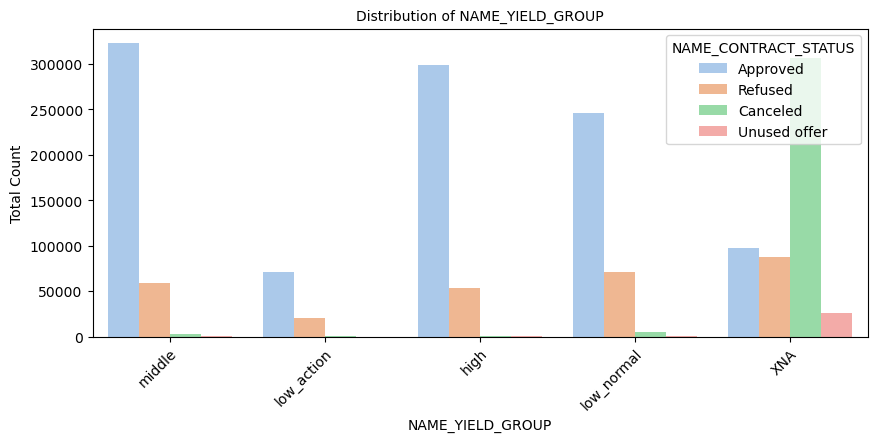

In [115]:
uniplot_prev_app('NAME_YIELD_GROUP')

###### Points to note:
1. In major cases the loan are approved.
2. Interest rate grouped into medium and low_normal have compratively similar rejection rate.
3. XNA field/unknown field has higest cancallation rate.

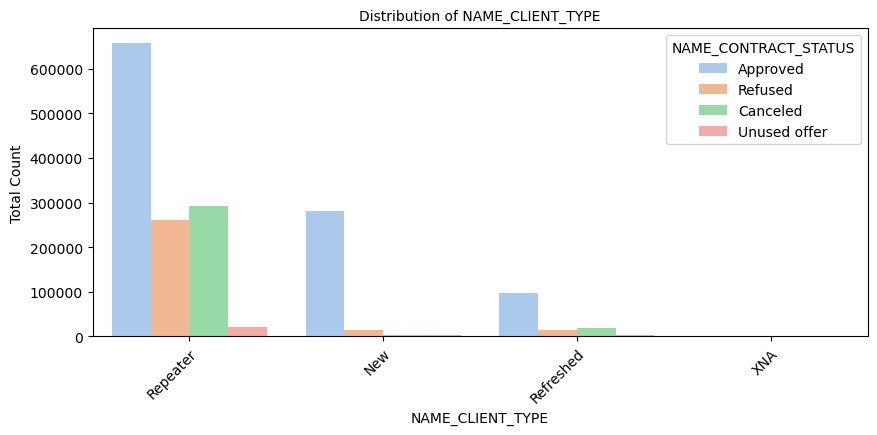

In [116]:
uniplot_prev_app('NAME_CLIENT_TYPE')

##### Points to note:
It is quite obvious and as seen from the above graph the cancellation of loan is more for Repeater as the bank keeps cibil score in mind before deciding the approval.

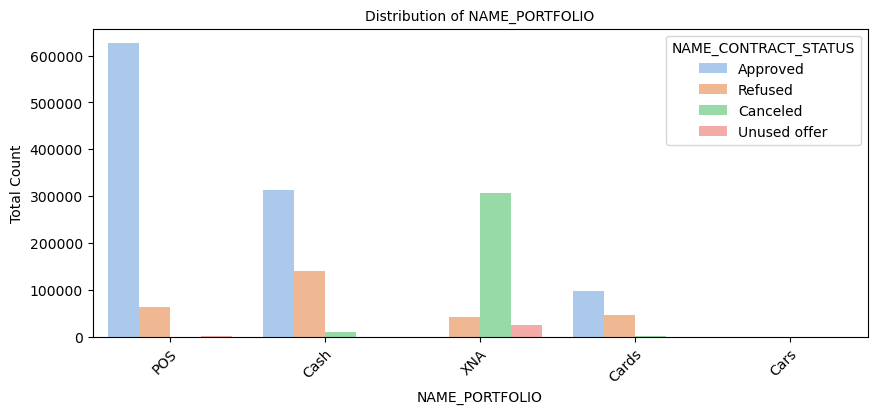

In [117]:
uniplot_prev_app('NAME_PORTFOLIO')

###### Points to note:
1. cash loans have more rejection rate.
2. Very low cancellation across NAME_PORTFOLIO.
2. POS (Point-of-sale) loan has higest approval because of its flexible repayment nature.

#### Bivariate analysis on continous columns: 'AMT_ANNUITY','AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE'

<Figure size 600x600 with 0 Axes>

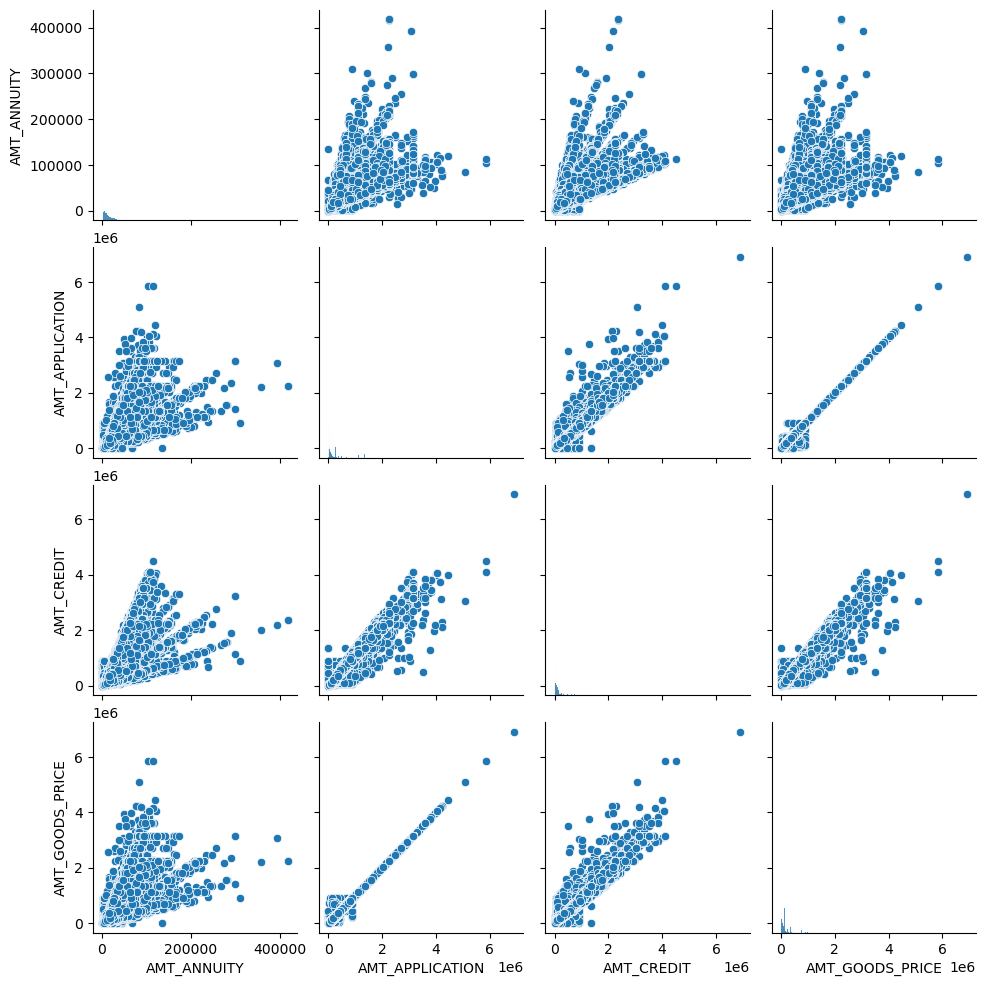

In [118]:
# Plotting the pairplot plot for Bivariate analysis for continous columns to check the trend of correlation in them
plt.figure(figsize=(6,6))
sns.pairplot(data=previous_application[['AMT_ANNUITY','AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']], palette="pastel");

##### Points to note:
1. 'AMT_ANNUITY','AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE' have good correlation in them. Similar pattern was also observed in current_application dataset.
2. Majority of the applicants belong to amount less than 20 Lakhs.

In [119]:
# Checking the contract status for previous clients by aggregating credited amount.
pd.pivot_table(data=previous_application, index="NAME_CONTRACT_STATUS",columns="NAME_CLIENT_TYPE",values="AMT_CREDIT", aggfunc = "mean")

NAME_CLIENT_TYPE                New      Refreshed       Repeater  \
NAME_CONTRACT_STATUS                                                
Approved              104025.960982  204809.831935  244352.146661   
Canceled               29739.009724   34923.959025   23424.759022   
Refused               172769.754362  351742.642226  383769.315980   
Unused offer           79955.690294   68186.019866   69046.338494   

NAME_CLIENT_TYPE                XNA  
NAME_CONTRACT_STATUS                 
Approved              214309.849593  
Canceled               17039.065574  
Refused               426577.498475  
Unused offer           60532.500000

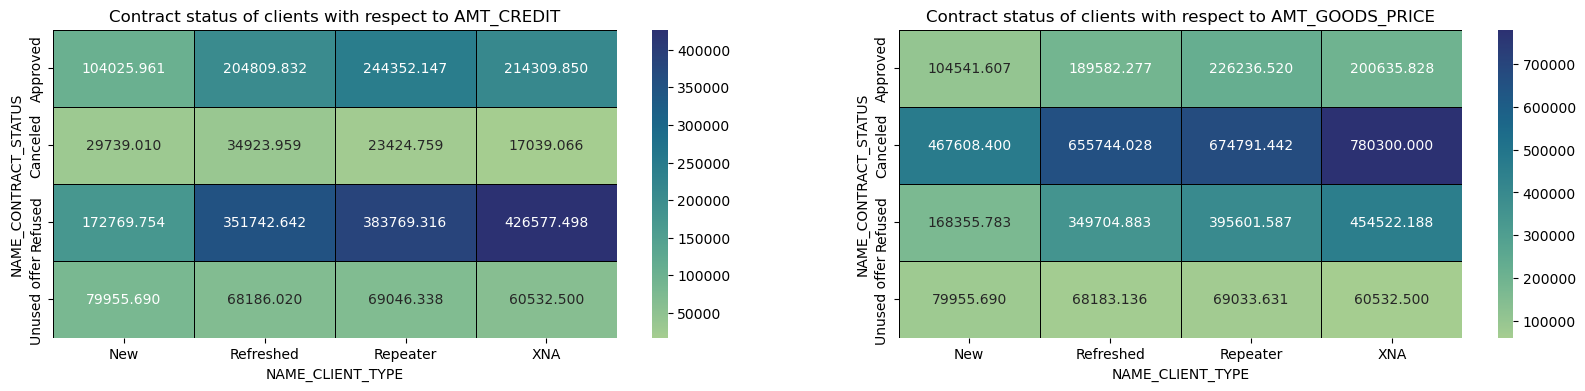

In [120]:
# Checking Contarct status of client with respect to AMOUNT_CREDIT
client_contract_credit = pd.pivot_table(data=previous_application, index="NAME_CONTRACT_STATUS",columns="NAME_CLIENT_TYPE",values="AMT_CREDIT", aggfunc = "mean")
client_contract_goods = pd.pivot_table(data=previous_application, index="NAME_CONTRACT_STATUS",columns="NAME_CLIENT_TYPE",values="AMT_GOODS_PRICE", aggfunc = "mean")

plt.figure(figsize = (20,4))

plt.subplot(1,2,1)
plt.title("Contract status of clients with respect to AMT_CREDIT")

sns.heatmap(client_contract_credit,cmap="crest", annot=True,fmt=".3f",linewidths = .5 ,linecolor = "k")

plt.subplot(1,2,2)
plt.title("Contract status of clients with respect to AMT_GOODS_PRICE")
sns.heatmap(client_contract_goods,cmap="crest", annot=True,fmt=".3f",linewidths = .5 ,linecolor = "k");

##### Points to note:
1. For both refreshed and repeater the average AMT_CREDIT is between 20 to 25 lakhs which is almost double than the new aplicants.
2. Unused offer remains high for goods as well as credit.
3. credit and goods Loans above 34 lakhs (approximately) have more refusal for repeater and refreshed.
4. Previous applicaton for Approved and cancelled have defaults which needs to be rechecked.

### 13. Merged data analysis:

In [121]:
# Merging current_application and previous_application. Will be performing inner merge because I want  to retain common rows.
current_application.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY AGE_GROUP INCOME_GROUP  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y  (25, 35]         High          202500.0    406597.5   
1               N  (45, 55]    Very High          270000.0   1293502.5   

   AMT_ANNUITY  AMT_GOODS_PRICE NAME_INCOME_TYPE  \
0      24700.5         351000.0          Working   
1      35698.5        1129500.0    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   YEARS_EMPLOYED  YEARS_REGISTRATION  AMT_REQ_CREDIT_BUREAU_MON  \
0             2.0                10.0                        0.0   
1             4.0                 4.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                         1.0   
1                        0.0                         0.0   

   REGION_RATING_CLIENT OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                     2        Laborers              1.0   
1                     1      Core staff              2.0   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                       2.0                       2.0   
1                  School                       1.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
0                       2.0                       2.0  
1                       1.0                       0.0

In [122]:
#merging the two dataframes and storing in new dataframe called as merged_df
merged_df = current_application.merge(previous_application, how = "inner", on = "SK_ID_CURR")
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY AGE_GROUP INCOME_GROUP  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y  (25, 35]         High          202500.0      406597.5   
1               N  (45, 55]    Very High          270000.0     1293502.5   
2               N  (45, 55]    Very High          270000.0     1293502.5   
3               N  (45, 55]    Very High          270000.0     1293502.5   
4               Y  (45, 55]     Very Low           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0          Working   
1        35698.5          1129500.0    State servant   
2        35698.5          1129500.0    State servant   
3        35698.5          1129500.0    State servant   
4         6750.0           135000.0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   YEARS_EMPLOYED  YEARS_REGISTRATION  AMT_REQ_CREDIT_BUREAU_MON  \
0             2.0                10.0                        0.0   
1             4.0                 4.0                        0.0   
2             4.0                 4.0                        0.0   
3             4.0                 4.0                        0.0   
4             1.0                12.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                         1.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   REGION_RATING_CLIENT OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                     2        Laborers              1.0   
1                     1      Core staff              2.0   
2                     1      Core staff              2.0   
3                     1      Core staff              2.0   
4                     2        Laborers              1.0   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                       2.0                       2.0   
1                  School                       1.0                       0.0   
2                  School                       1.0                       0.0   
3                  School                       1.0                       0.0   
4              Government                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  SK_ID_PREV  \
0                       2.0                       2.0     1038818   
1                       1.0                       0.0     1810518   
2                       1.0                       0.0     2636178   
3                       1.0                       0.0     2396755   
4                       0.0                       0.0     1564014   

  NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  \
0       Consumer loans       9251.775         179055.0      179055.0   
1           Cash loans      98356.995         900000.0     1035882.0   
2       Consumer loans      64567.665         337500.0      348637.5  

In [123]:
# separating the dataframe to defaulters (target 1) and non-defaulters(target 0) for analysing
merged_df_T1=merged_df[merged_df.TARGET==1]  
merged_df_T0=merged_df[merged_df.TARGET==0] 

In [124]:
#univariate plot for merged data
def uniplot_mergerd(var):
    
    fig, (ax1,ax2) =plt.subplots(1,2,figsize=[16,4])
    
    sns.countplot(data=merged_df_T1, x=var, ax = ax1, palette="pastel", hue= "CODE_GENDER", order = merged_df[var].value_counts().index)
    ax1.set_ylabel('Total Count')
    ax1.set_title(f'{var} for defaulters (TARGET = 1)',fontsize=12)
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation =45, ha="right", rotation_mode = "anchor")
    
    sns.countplot(data=merged_df_T0, x=var, ax = ax2, palette="pastel",hue= "CODE_GENDER", order = merged_df[var].value_counts().index)
    ax2.set_ylabel('Total Count')
    ax2.set_title(f'{var} for Non-Defaulters (TARGET = 0)',fontsize=12)    
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation =45, ha="right", rotation_mode = "anchor");

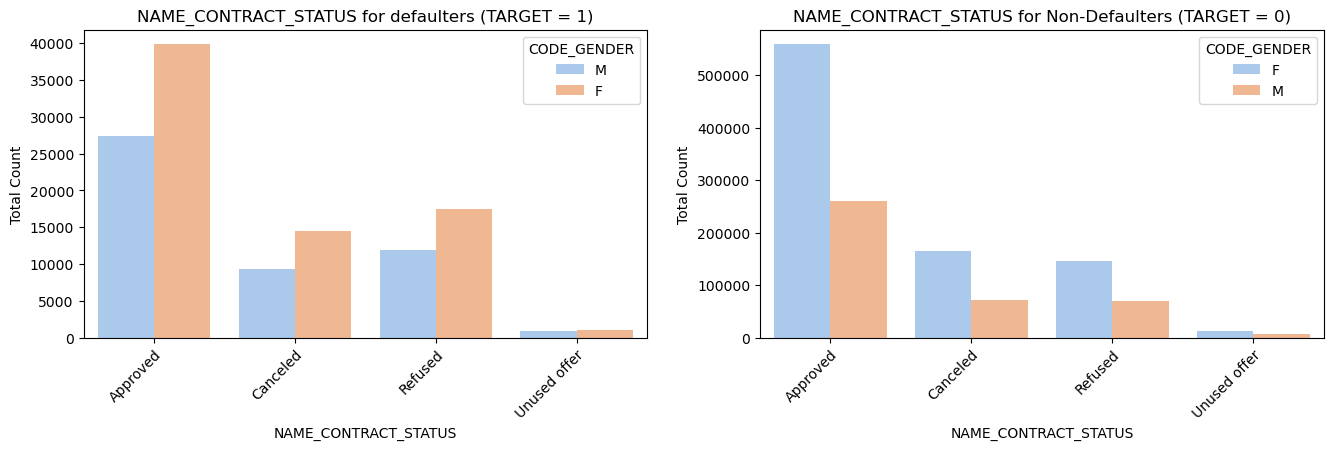

In [125]:
uniplot_mergerd("NAME_CONTRACT_STATUS")

In [126]:
round(merged_df.groupby("NAME_CONTRACT_STATUS")["TARGET"].value_counts(normalize = True)*100,2)

NAME_CONTRACT_STATUS  TARGET
Approved              0         92.41
                      1          7.59
Canceled              0         90.83
                      1          9.17
Refused               0         88.00
                      1         12.00
Unused offer          0         91.75
                      1          8.25
Name: TARGET, dtype: float64

#### Points to note:
1. The approved loans have 7.59%, Cancelled have 9.17%, refused have 12% and unused offer have 8.25% of defaults. This indicated that the company has given aproval of loan for the previousy refused or cancelled loan and thus have defaulters.
2. This graph also shows male are relatively more defaulters.

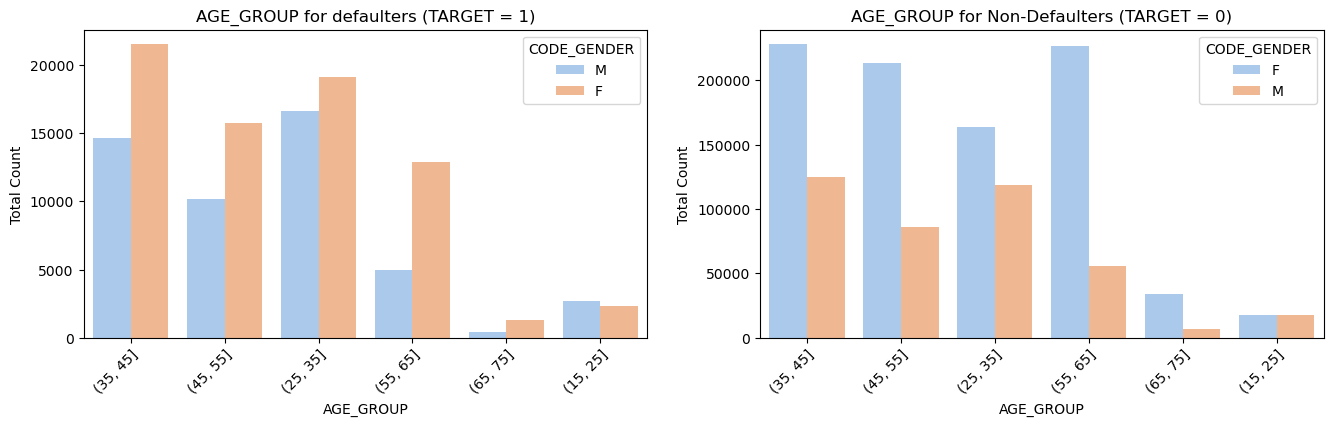

In [127]:
uniplot_mergerd("AGE_GROUP")

In [128]:
(merged_df.groupby("AGE_GROUP")["TARGET"].value_counts(normalize = True)*100,2)

(AGE_GROUP  TARGET
 (15, 25]   0         87.539306
            1         12.460694
 (25, 35]   0         88.766347
            1         11.233653
 (35, 45]   0         90.699046
            1          9.300954
 (45, 55]   0         92.028977
            1          7.971023
 (55, 65]   0         94.037212
            1          5.962788
 (65, 75]   0         95.884667
            1          4.115333
 Name: TARGET, dtype: float64,
 2)

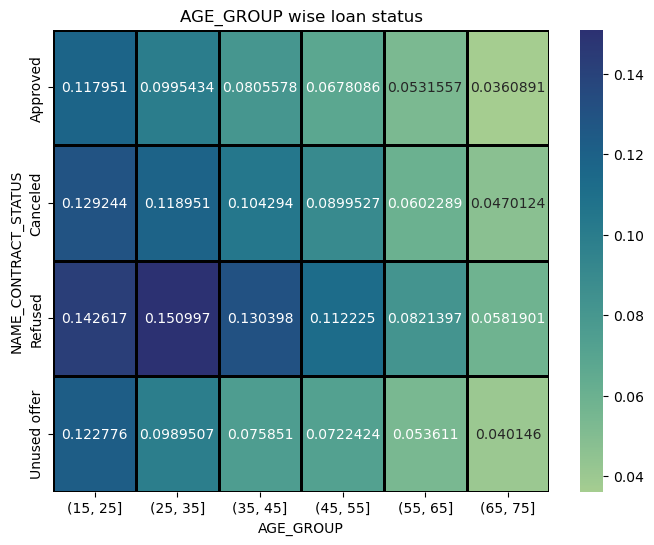

In [129]:
#bivariate plots for NAME_CONTRACT_STATUS vs AGE_GROUP considering mean.
plt.figure(figsize=(8,6))
piv=pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values='TARGET', aggfunc="mean")
sns.heatmap(piv, annot=True,cmap='crest', fmt="g",linewidths =1 ,linecolor = "k")
plt.title("AGE_GROUP wise loan status");

##### Points to note:
1. Middle aged group i,e from 25 to 45 have high defaults.
2. Loan approval for age group 15-25 needs to be rechecked

In [130]:
#plotting a point plot to verify relation between variables
def relation_plot(data,hue,x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, y=y, hue=hue, data=data)
    plt.title(x+" VS "+y+ " "+"analysis",fontsize = 10)

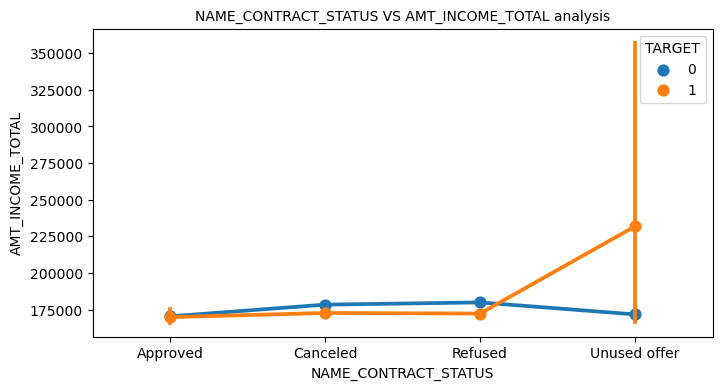

In [131]:
relation_plot(merged_df,"TARGET","NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL');

#### Points to note:
1. Applicants with Unused offer have defaulted irrespective of their income.

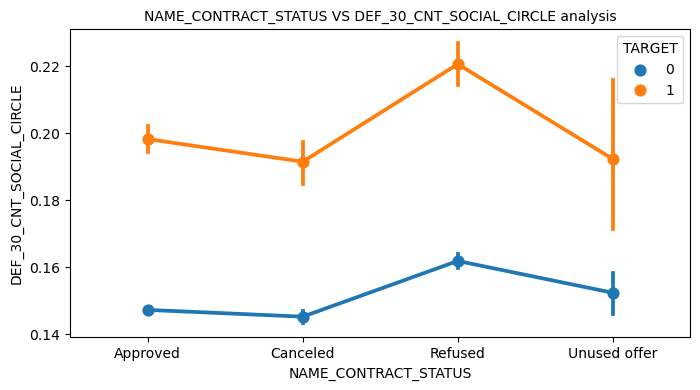

In [132]:
relation_plot(merged_df,"TARGET","NAME_CONTRACT_STATUS",'DEF_30_CNT_SOCIAL_CIRCLE');

#### Points to note:
1. Applicants with average score of above 0.18 of social surroundings defaulted on 30 days past due date tends to default more. Hence bank should check social circle for loan disbursment.

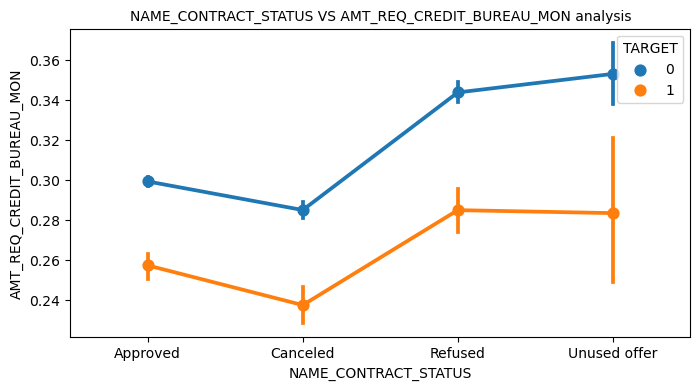

In [133]:
relation_plot(merged_df,"TARGET","NAME_CONTRACT_STATUS",'AMT_REQ_CREDIT_BUREAU_MON');

##### Point to note:
Across all the loan status the Number of enquiries to Credit Bureau has one month before application (excluding one week before application) is lower which indicates the applicant might be looking for another loan from other financial company. The number of enquiry more meaning the client tends more towards default.

### 14. Inference:

The following variables prove to be the driving factors for the defaulters: 

                                       Driving variables

1. CODE_GENDER: Males are relatively more Defaulters.
2. INCOME_GROUP: Males with medium and high income group defaults more.
3. DAYS_BIRTH: Age group of 25 to 35 is the most risky group to grant loan.
4. NAME_INCOME_TYPE: Working category ( 61.32% of all defaults) has high defaulters compared to other groups.
5. NAME_EDUCATION_TYPE: Unemployed, student, maternity leave at higher risk of default.
                        Lower secondary, Academic degree and Incomplete higher education tends to default more.
6. OCCUPATION_TYPE: 37.48% among all the defaulters belongs Laborers group
                       Sales staff also have more defaulters- 16.68%, Drivers have 11.36%  high default rate.
7. REGION_RATING_CLIENT:Rating 3 has highest default.
8. NAME_FAMILY_STATUS:Married clients belonging from 25 to 45 age group have more payment difficulties and tend more towards defaulters.
                        Single/not married and widow are risky group
9. CNT_FAMILY_MEMBERS: Family with 2 to 3 members have more defaults.  After 6 family members the rate of default increases to 100%
10. AMT_CREDIT: As the AMT_CREDIT increase beyond 2 Lakhs the defaulter rate increases.
11. AMT_GOODS_PRICE: The defaulter rate increases if AMT_CREDIT goes beyond 5 Lakhs.
    
     
                                      Supporting variables

1. FLAG_OWN_CAR: Car owners are less defaulters.
2. NAME_HOUSING_TYPE: As the AMT_CREDIT increase beyond 2 Lakhs the defaulter rate increases.
3. FLAG_OWN_REALTY: Realty owners are less defaulters.
4. OBS_30_CNT_SOCIAL_CIRCLE: If the observations for social surroundings are more then client may also needs to be verified for default.

### 15. Conclusion:
1. Females with higher income and education to be given more weightage when granting loans.
2. Males with higher income should be given weightage
3. State servants very less defaults and can be considered as safe to grant loan.
4. Unused loan amount have lower applications which needs verification to identify underlying reason.
5. Introducing more revised offers to higher-income group will be beneficial as they tend to default less.
6. Refreshed and widow who have unused status earlier needs verification.